#### Problem Description
The goal of this project is to develop a forecasting model that accurately predicts future electricity consumption. The dataset includes variables such as global active power, global reactive power, voltage, and sub-metering measurements.



#### Generale Information about the features present in the dataset (Household Power Consumption)

1) global_active_power: household global minute-averaged active power (in kilowatt)
2) global_reactive_power: household global minute-averaged reactive power (in kilowatt)
3) global_intensity: household global minute-averaged current intensity (in ampere)
4) sub_metering_1: energy sub-metering No. 1 (in watt-hour of active energy). It corresponds to the kitchen, containing mainly a         dishwasher, an oven and a microwave (hot plates are not electric but gas powered).
5) sub_metering_2: energy sub-metering No. 2 (in watt-hour of active energy). It corresponds to the laundry room, containing a washing-machine, a tumble-drier, a refrigerator and a light.
6) sub_metering_3: energy sub-metering No. 3 (in watt-hour of active energy). It corresponds to an electric water-heater and an air-conditioner.


Reading the dataset

In [1]:
import pandas as pd

def read_timeseries_data(file_path, delimiter=";"):
    """
    Read time series data from a CSV file.

    Parameters:
    - file_path (str): The path to the CSV file.
    - delimiter (str): The delimiter used in the CSV file.

    Returns:
    - DataFrame: The loaded time series data.
    """
    try:
        df = pd.read_csv(file_path, delimiter=delimiter)
        print("Shape of the dataset:", df.shape)
        print('*' * 50)
        print(df.dtypes)
        return df
    except FileNotFoundError:
        print(f"File not found at {file_path}. Please check the file path.")
        return None

# Example usage
file_path = "/home/arpit/Public/Time-Series/household_power_consumption.txt"
timeseries_data = read_timeseries_data(file_path)
if timeseries_data is not None:
    print(timeseries_data.head())


Shape of the dataset: (2075259, 9)
**************************************************
Date                      object
Time                      object
Global_active_power       object
Global_reactive_power     object
Voltage                   object
Global_intensity          object
Sub_metering_1            object
Sub_metering_2            object
Sub_metering_3           float64
dtype: object
         Date      Time Global_active_power Global_reactive_power  Voltage  \
0  16/12/2006  17:24:00               4.216                 0.418  234.840   
1  16/12/2006  17:25:00               5.360                 0.436  233.630   
2  16/12/2006  17:26:00               5.374                 0.498  233.290   
3  16/12/2006  17:27:00               5.388                 0.502  233.740   
4  16/12/2006  17:28:00               3.666                 0.528  235.680   

  Global_intensity Sub_metering_1 Sub_metering_2  Sub_metering_3  
0           18.400          0.000          1.000            17.0  


/tmp/ipykernel_9169/948093535.py:15: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, delimiter=delimiter)


Observation :- The dataset contain 2075259 Records and 9 Columns and as we see the datatype of columns are objects so we need to change them.

In [2]:
# Convert datatype of certain into float

def convert_to_numeric(df, column, errors='coerce'):
    """
    Convert a specific column to numeric data type with error handling.

    Parameters:
    - df (DataFrame): The DataFrame containing the column.
    - column (str): The column name to be converted.
    - errors (str): Error handling strategy (default is 'coerce').

    Returns:
    - DataFrame: The DataFrame with the converted column.
    """
    df[column] = pd.to_numeric(df[column], errors=errors)
    return df

# List of columns to convert to numeric
columns_to_convert = ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2','Sub_metering_3']

# Apply the conversion functions for each column
for column in columns_to_convert:
    timeseries_data = convert_to_numeric(timeseries_data, column)

# Confirm the updated data types
print(timeseries_data.dtypes)


Date                      object
Time                      object
Global_active_power      float64
Global_reactive_power    float64
Voltage                  float64
Global_intensity         float64
Sub_metering_1           float64
Sub_metering_2           float64
Sub_metering_3           float64
dtype: object


In [3]:
# Statistical Summary Check 
def display_statistics(df):
    """
    Display statistical summary of the DataFrame.
    """
    print(df.describe())


# Apply the function to display statistics
display_statistics(timeseries_data)

       Global_active_power  Global_reactive_power       Voltage  \
count         2.049280e+06           2.049280e+06  2.049280e+06   
mean          1.091615e+00           1.237145e-01  2.408399e+02   
std           1.057294e+00           1.127220e-01  3.239987e+00   
min           7.600000e-02           0.000000e+00  2.232000e+02   
25%           3.080000e-01           4.800000e-02  2.389900e+02   
50%           6.020000e-01           1.000000e-01  2.410100e+02   
75%           1.528000e+00           1.940000e-01  2.428900e+02   
max           1.112200e+01           1.390000e+00  2.541500e+02   

       Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  
count      2.049280e+06    2.049280e+06    2.049280e+06    2.049280e+06  
mean       4.627759e+00    1.121923e+00    1.298520e+00    6.458447e+00  
std        4.444396e+00    6.153031e+00    5.822026e+00    8.437154e+00  
min        2.000000e-01    0.000000e+00    0.000000e+00    0.000000e+00  
25%        1.400000e+00   

In [4]:
# Extracting the Month, Year and Day, Hour and creating new features for better understanding

def extract_datetime_components(df, date_column, time_column):
    """
    Extract date and time components and add them as new columns to the DataFrame.

    Parameters:
    - df (DataFrame): The DataFrame containing date and time columns.
    - date_column (str): The name of the date column.
    - time_column (str): The name of the time column.

    Returns:
    - DataFrame: The DataFrame with additional date and time components.
    """
    df['DateTime'] = pd.to_datetime(df[date_column] + ' ' + df[time_column])
    df['Year'] = df['DateTime'].dt.year
    df['Month'] = df['DateTime'].dt.month
    df['Day'] = df['DateTime'].dt.day
    df['Hour'] = df['DateTime'].dt.hour
    df['Minute'] = df['DateTime'].dt.minute
    return df

# Specify the names of date and time columns
date_column_name = 'Date'
time_column_name = 'Time'

# Apply the function to extract date and time components
timeseries_data = extract_datetime_components(timeseries_data, date_column_name, time_column_name)

# Display the updated DataFrame
(timeseries_data.head())


/tmp/ipykernel_9169/2789459527.py:15: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['DateTime'] = pd.to_datetime(df[date_column] + ' ' + df[time_column])


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,DateTime,Year,Month,Day,Hour,Minute
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,2006-12-16 17:24:00,2006,12,16,17,24
1,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,2006-12-16 17:25:00,2006,12,16,17,25
2,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,2006-12-16 17:26:00,2006,12,16,17,26
3,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,2006-12-16 17:27:00,2006,12,16,17,27
4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,2006-12-16 17:28:00,2006,12,16,17,28


Distribution check of Original Data

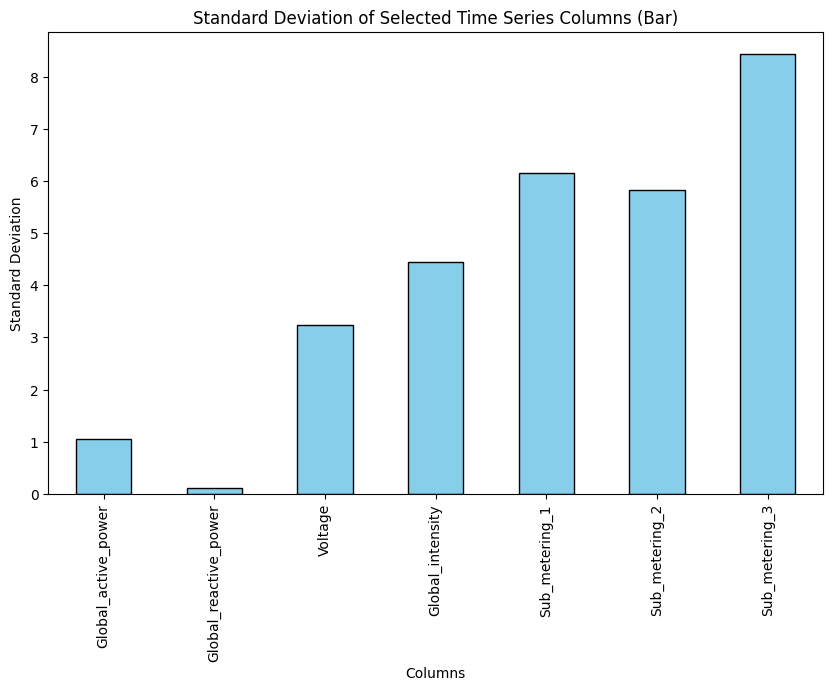

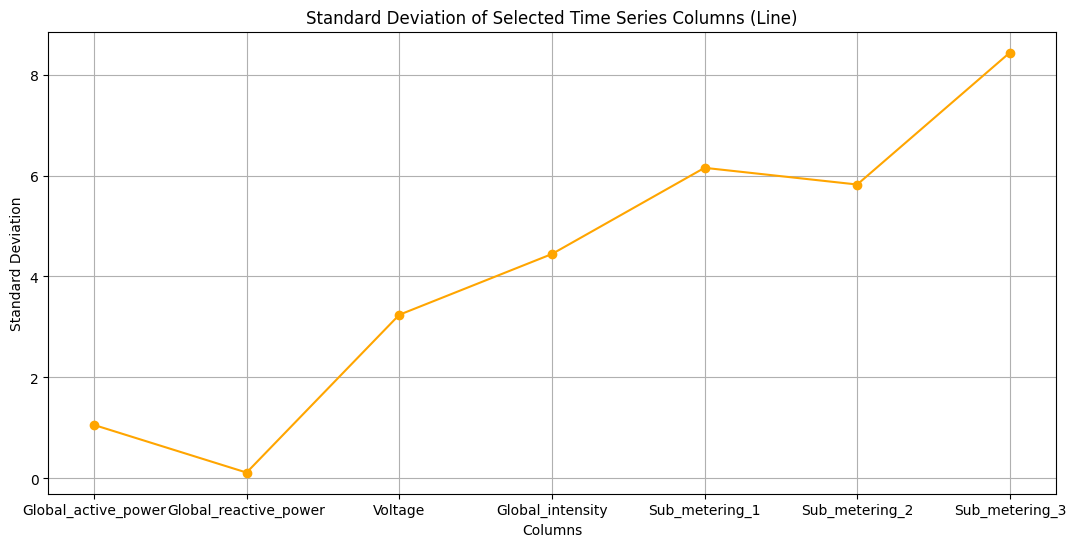

In [5]:
import matplotlib.pyplot as plt

def plot_std_of_selected_columns(df, selected_columns):
    """
    Plot the standard deviation of selected columns from the DataFrame.

    Parameters:
    - df (DataFrame): The DataFrame containing the selected columns.
    - selected_columns (list): List of column names to calculate the standard deviation.

    Returns:
    - None: The function displays both bar and line plots.
    """
    dataset_subset = df[selected_columns]
    std_values = dataset_subset.std()

    # Plotting the standard deviation values as a bar graph
    std_values.plot(kind='bar', figsize=(10, 6), color='skyblue', edgecolor='black')
    plt.title('Standard Deviation of Selected Time Series Columns (Bar)')
    plt.xlabel('Columns')
    plt.ylabel('Standard Deviation')
    plt.show()

    # Plotting the standard deviation values as a line graph
    std_values.plot(kind='line', marker='o', figsize=(13, 6), color='orange')
    plt.title('Standard Deviation of Selected Time Series Columns (Line)')
    plt.xlabel('Columns')
    plt.ylabel('Standard Deviation')
    plt.grid(True)
    plt.show()


# Specify the names of selected columns
selected_columns_list = ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']

# Apply the function to plot both bar and line graphs
plot_std_of_selected_columns(timeseries_data, selected_columns_list)


Observation :- Standard deviation of Sub_metering_3(electric heater and air conditioner taking higher voltage) is higher than Standard deviation of other columns.
This increased variability may suggest that the energy consumption associated with the electric water-heater and air-conditioner (captured by 'Sub_metering_3') has more dynamic patterns or changes over time

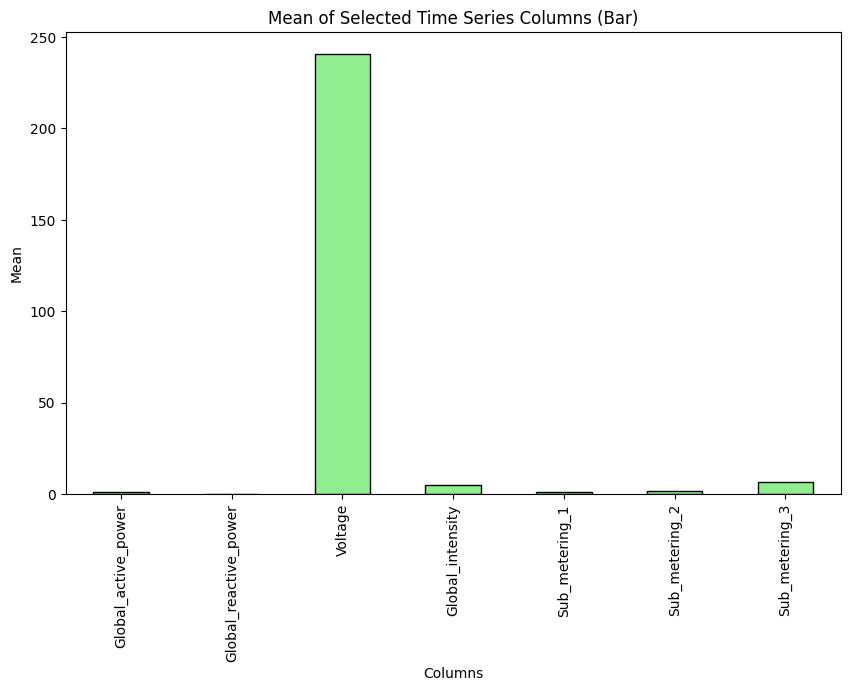

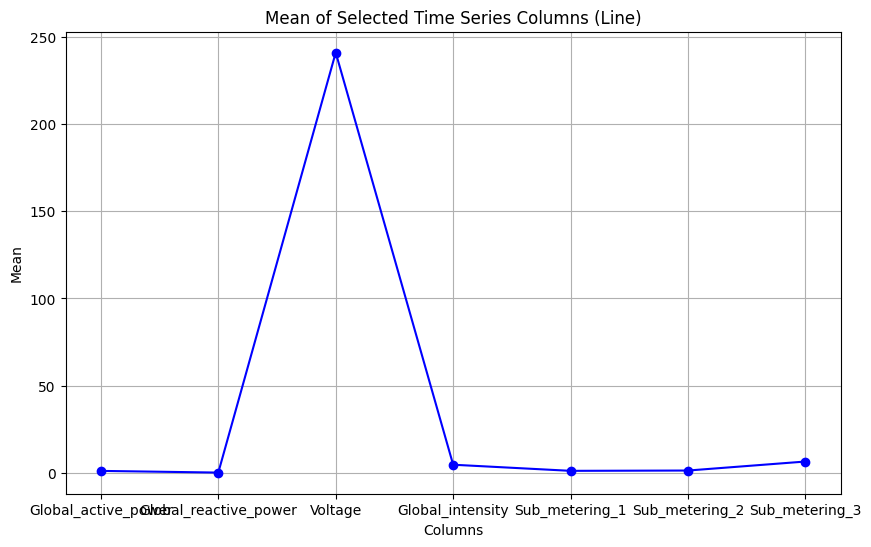

In [6]:
import matplotlib.pyplot as plt

def plot_mean_of_selected_columns(df, selected_columns):
    """
    Plot the mean of selected columns from the DataFrame.

    
    - df (DataFrame): The DataFrame containing the selected columns.
    - selected_columns (list): List of column names to calculate the mean.

    """
    dataset_subset = df[selected_columns]
    mean_values = dataset_subset.mean()

    # Plotting the mean values as a bar graph
    mean_values.plot(kind='bar', figsize=(10, 6), color='lightgreen', edgecolor='black')
    plt.title('Mean of Selected Time Series Columns (Bar)')
    plt.xlabel('Columns')
    plt.ylabel('Mean')
    plt.show()

    # Plotting the mean values as a line graph
    mean_values.plot(kind='line', marker='o', figsize=(10, 6), color='blue')
    plt.title('Mean of Selected Time Series Columns (Line)')
    plt.xlabel('Columns')
    plt.ylabel('Mean')
    plt.grid(True)
    plt.show()


# Specify the names of selected columns
selected_columns_list = ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']

# Apply the function to plot both bar and line graphs for mean values
plot_mean_of_selected_columns(timeseries_data, selected_columns_list)


Observation: The 'Voltage' column has a higher mean compared to the other selected time series columns.
This may indicate that the average voltage values are generally higher than the other measurements.

Null/Missing values and their percentages check 

In [7]:
def check_null_values(df):
    """
    Check and display the total count and percentage of null values in each column of the DataFrame.

    Parameters:
    - df (DataFrame): The DataFrame to check for null values.

    Returns:
    - None: The function prints the results.
    """
    # Checking the null values
    null_values = df.isnull().sum()

    # Calculate the percentage of null values for each column
    total_rows = df.shape[0]
    percentage_null = (null_values / total_rows) * 100

    # Display the total count and percentage of null values for each column
    print("Total count of null values:")
    print(null_values)
    print("\nPercentage of null values:")
    print(percentage_null)


# Apply the function to check null values
check_null_values(timeseries_data)


Total count of null values:
Date                         0
Time                         0
Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
DateTime                     0
Year                         0
Month                        0
Day                          0
Hour                         0
Minute                       0
dtype: int64

Percentage of null values:
Date                     0.000000
Time                     0.000000
Global_active_power      1.251844
Global_reactive_power    1.251844
Voltage                  1.251844
Global_intensity         1.251844
Sub_metering_1           1.251844
Sub_metering_2           1.251844
Sub_metering_3           1.251844
DateTime                 0.000000
Year                     0.000000
Month                    0.000000
Day                      0.000000
Hour                    

Observation :- The dataset contains some missing values in the measurements (nearly 1.25% of the total rows).

### Handling the null values
1) Using the ffill method for handling missing values involves forward-filling, where the last observed value is carried forward to fill the gaps in the dataset. This method is useful when missing values are assumed to have a similar trend as the preceding data points.

2) The mean method involves replacing missing values with the mean of the available data. This approach is effective for maintaining the central tendency of the dataset, providing a balanced representation, but may be sensitive to outliers. Both methods serve as simple imputation techniques for handling missing values in time series data.

In [8]:
def impute_missing_values(df, columns_to_impute):
    """
    Impute missing values in the specified columns of the DataFrame using mean imputation.

    Parameters:
    - df (DataFrame): The DataFrame containing the columns with missing values.
    - columns_to_impute (list): List of column names to impute.

    Returns:
    - DataFrame: The DataFrame with imputed missing values.
    """
    df_copy = df.copy()

    # Impute missing values only in selected columns
    for col in columns_to_impute:
        df_copy[col] = df_copy[col].fillna(df_copy[col].mean())

    return df_copy



# Specify the names of columns to impute
columns_to_impute_list = ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']

# Apply the function to impute missing values
imputed_data = impute_missing_values(timeseries_data, columns_to_impute_list)

# Display the number of missing values per column in the new DataFrame
print('Number of missing values per column after imputation')
print(imputed_data.isnull().sum())


Number of missing values per column after imputation
Date                     0
Time                     0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
DateTime                 0
Year                     0
Month                    0
Day                      0
Hour                     0
Minute                   0
dtype: int64


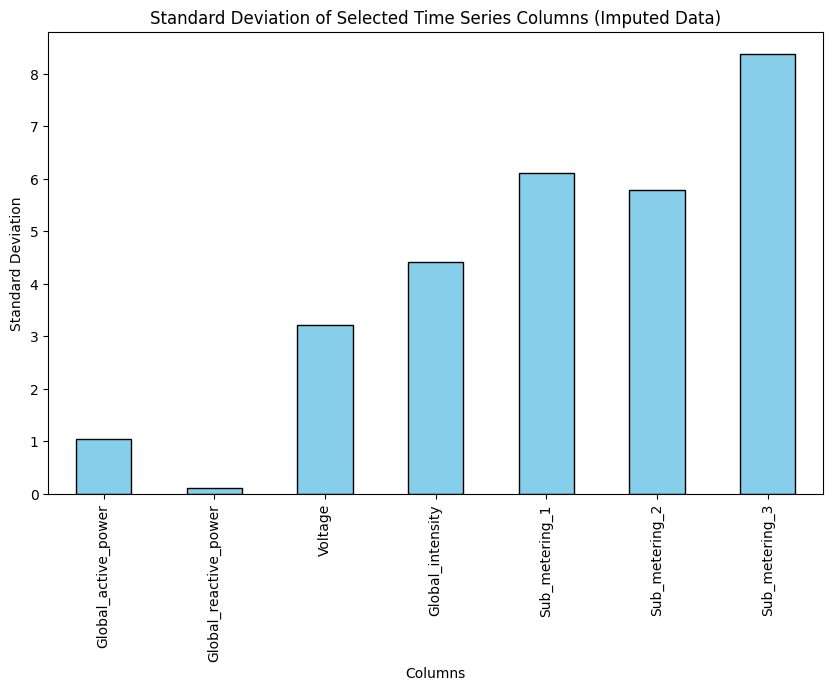

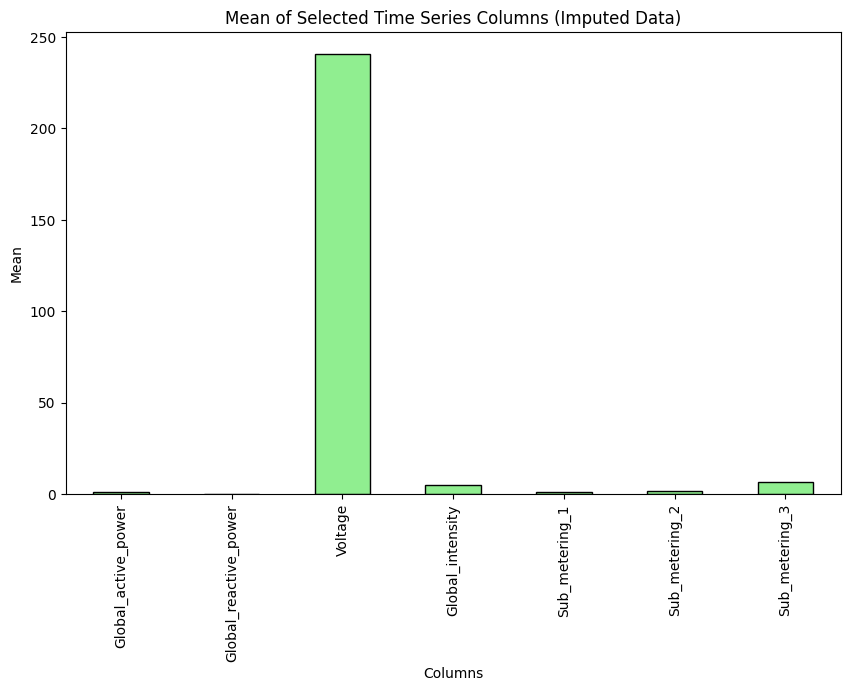

In [9]:
# Calculate the standard deviation for each column in the imputed data
std_values_imputed = imputed_data[columns_to_impute_list].std()

# Plotting the standard deviation values for the imputed data
std_values_imputed.plot(kind='bar', figsize=(10, 6), color='skyblue', edgecolor='black')
plt.title('Standard Deviation of Selected Time Series Columns (Imputed Data)')
plt.xlabel('Columns')
plt.ylabel('Standard Deviation')
plt.show()

# Calculate the mean for each column in the imputed data
mean_values_imputed = imputed_data[columns_to_impute_list].mean()

# Plotting the mean values for the imputed data
mean_values_imputed.plot(kind='bar', figsize=(10, 6), color='lightgreen', edgecolor='black')
plt.title('Mean of Selected Time Series Columns (Imputed Data)')
plt.xlabel('Columns')
plt.ylabel('Mean')
plt.show()



Observation :- The distribution of data after handling the missing values are almost same as the original data distribution

Distribution check before and after handling the missing values

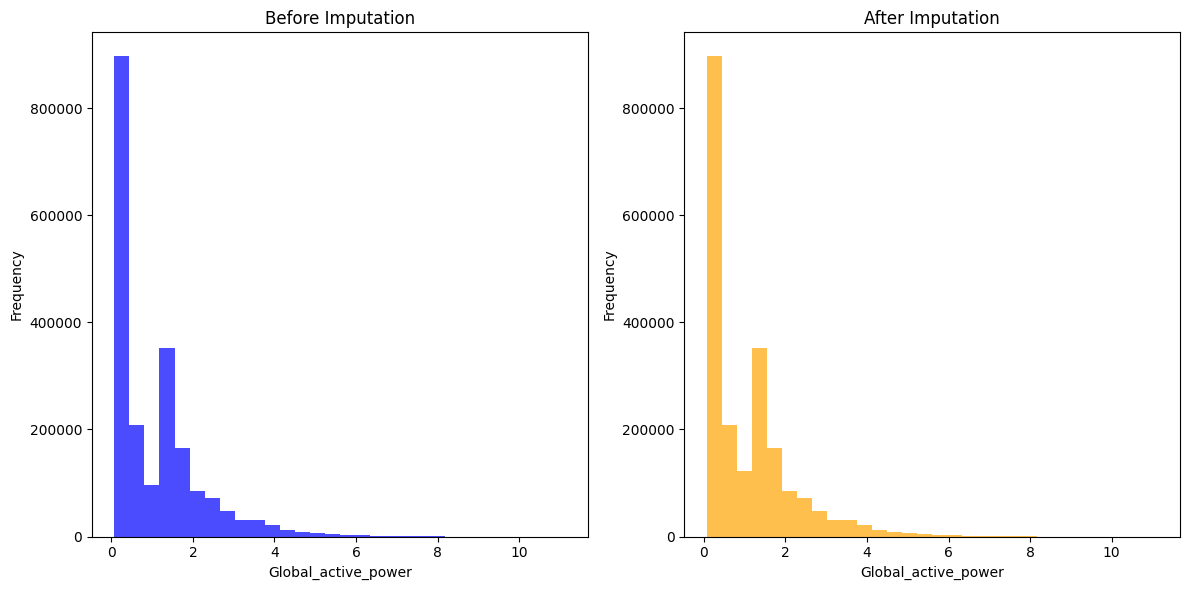

In [10]:
import matplotlib.pyplot as plt

def plot_imputation_histograms(data_before, data_after, column_of_interest, bins=30):
    """
    Plot histograms before and after imputation for a specific column.

    Parameters:
    - data_before: DataFrame before imputation
    - data_after: DataFrame after imputation
    - column_of_interest: Name of the column to analyze
    - bins: Number of bins for the histogram (default is 30)
    """

    # Plotting the histogram before and after imputation
    plt.figure(figsize=(12, 6))

    # Before imputation
    plt.subplot(1, 2, 1)
    plt.hist(data_before[column_of_interest].dropna(), bins=bins, color='blue', alpha=0.7)
    plt.title('Before Imputation')
    plt.xlabel(column_of_interest)
    plt.ylabel('Frequency')

    # After imputation
    plt.subplot(1, 2, 2)
    plt.hist(data_after[column_of_interest], bins=bins, color='orange', alpha=0.7)
    plt.title('After Imputation')
    plt.xlabel(column_of_interest)
    plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()


plot_imputation_histograms(timeseries_data, imputed_data, 'Global_active_power')



Handling missing values using ffill method

In [11]:
def fillna_ffill(data):
    """
    Fill null values in a DataFrame using forward-fill.

    

    Returns:
    - DataFrame with null values filled using forward-fill
    """
    return data.fillna(method='ffill')


timeseries_data_ffill = fillna_ffill(timeseries_data)
#Display the DataFrame with null values filled using forward-fill
(timeseries_data_ffill.head())


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,DateTime,Year,Month,Day,Hour,Minute
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,2006-12-16 17:24:00,2006,12,16,17,24
1,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,2006-12-16 17:25:00,2006,12,16,17,25
2,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,2006-12-16 17:26:00,2006,12,16,17,26
3,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,2006-12-16 17:27:00,2006,12,16,17,27
4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,2006-12-16 17:28:00,2006,12,16,17,28


In [12]:
def check_null_values(data):
    """
    Check and display null values in a DataFrame.

    Parameters:
    - data: DataFrame to be checked for null values
    """
    null_values = data.isnull().sum()
    if null_values.sum() == 0:
        print("No null values found in the DataFrame.")
    else:
        print("Number of null values per column:")
        print(null_values)


check_null_values(timeseries_data_ffill)


No null values found in the DataFrame.


Distribution check before and after handling the missing values

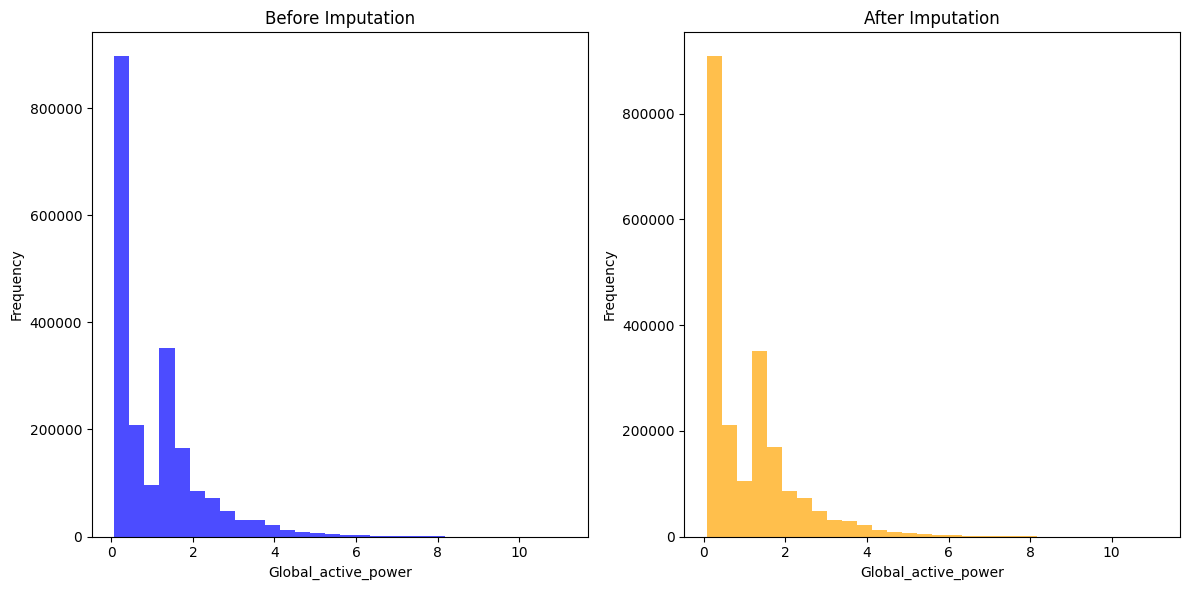

In [13]:
def plot_imputation_histograms(data_before, data_after, column_of_interest, bins=30):
    """
    Plot histograms before and after imputation for a specific column.

    Parameters:
    - data_before: DataFrame before imputation
    - data_after: DataFrame after imputation
    - column_of_interest: Name of the column to analyze
    - bins: Number of bins for the histogram (default is 30)
    """

    # Plotting the histogram before and after imputation
    plt.figure(figsize=(12, 6))

    # Before imputation
    plt.subplot(1, 2, 1)
    plt.hist(data_before[column_of_interest].dropna(), bins=bins, color='blue', alpha=0.7)
    plt.title('Before Imputation')
    plt.xlabel(column_of_interest)
    plt.ylabel('Frequency')

    # After imputation
    plt.subplot(1, 2, 2)
    plt.hist(data_after[column_of_interest], bins=bins, color='orange', alpha=0.7)
    plt.title('After Imputation')
    plt.xlabel(column_of_interest)
    plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()


plot_imputation_histograms(timeseries_data, timeseries_data_ffill, 'Global_active_power')


Heat Map check which is difference of stats of imputed data and stats of original data.These heatmap between ffill and original data.

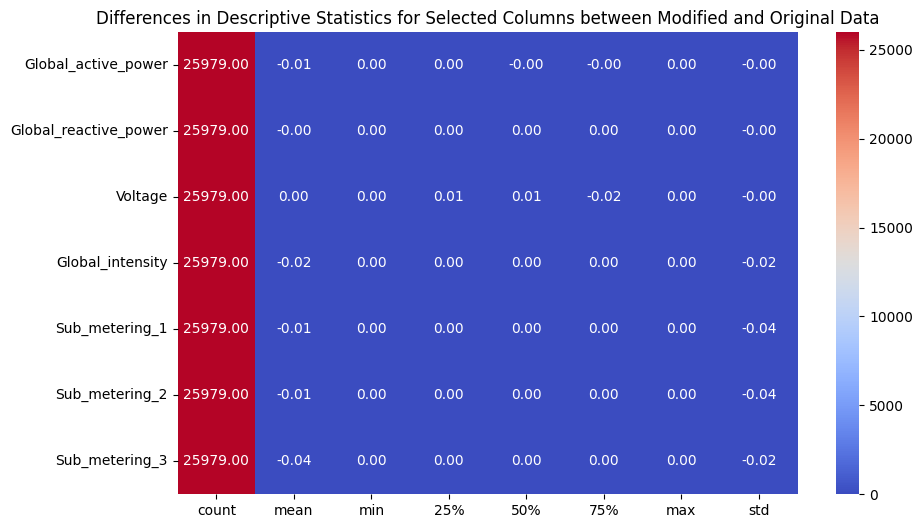

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_descriptive_stats_differences(original_data, modified_data, columns_of_interest):
    """
    Plot differences in descriptive statistics between two DataFrames for selected columns.

    Parameters:
    - original_data: Original DataFrame
    - modified_data: Modified DataFrame
    - columns_of_interest: List of columns to analyze

    Returns:
    - None (displays the heatmap plot)
    """
    # Calculate the differences in descriptive statistics
    df_difference = modified_data.describe() - original_data.describe()

    # Plotting the differences as a heatmap for the specified columns
    plt.figure(figsize=(10, 6))
    sns.heatmap(df_difference.loc[:, columns_of_interest].T, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title(f'Differences in Descriptive Statistics for Selected Columns between Modified and Original Data')
    plt.show()


plot_descriptive_stats_differences(timeseries_data, timeseries_data_ffill, ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3'])


Observation :- From the heat map we see that after imputation their is not much of difference so even by the above all observations we can conclude that we can any method either mean or ffill method to handle the missing values 

These heatmap between the stats of handling missing values with mean and the stats original data 

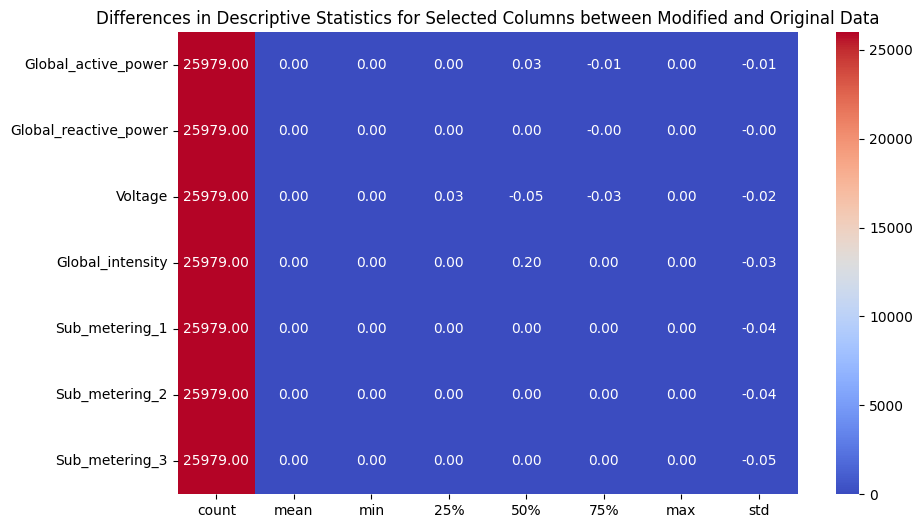

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_descriptive_stats_differences(original_data, modified_data, columns_of_interest):
    """
    Plot differences in descriptive statistics between two DataFrames for selected columns.

    Parameters:
    - original_data: Original DataFrame
    - modified_data: Modified DataFrame
    - columns_of_interest: List of columns to analyze

    Returns:
    - None (displays the heatmap plot)
    """
    # Calculate the differences in descriptive statistics
    df_difference = modified_data.describe() - original_data.describe()

    # Plotting the differences as a heatmap for the specified columns
    plt.figure(figsize=(10, 6))
    sns.heatmap(df_difference.loc[:, columns_of_interest].T, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title(f'Differences in Descriptive Statistics for Selected Columns between Modified and Original Data')
    plt.show()


plot_descriptive_stats_differences(timeseries_data, imputed_data, ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3'])


Creating new feature to see the power consumption also in weekday and weekend days

In [16]:
import datetime as dt
# Function to determine if a date is a holiday
def is_holiday(date):
    # Extracting year, month, and day from the date string
    year = int(date.split('/')[2])
    month = int(date.split('/')[1])
    day = int(date.split('/')[0])
    
    # Creating a datetime object for the given date
    if dt.datetime(year, month, day).weekday() >= 5:  # Checking if the weekday is Saturday (5) or Sunday (6)
        return 1.0  # Return 1.0 if it's a holiday (weekend)
    else:
        return 0.0  # Return 0.0 if it's not a holiday (weekday)

# Loop over a list containing the DataFrame (presumably named sampled_df)
for data in [timeseries_data_ffill]:
    # Applying the is_holiday function to the 'Date' column and creating a new 'Is_holiday' column
    data['Is_holiday'] = data['Date'].apply(lambda x: is_holiday(x))
    
    # Creating a new 'Light' column based on the 'Time' column, indicating daylight hours (1.0) or nighttime (0.0)
    data['Light'] = data['Time'].apply(lambda x: 1.0 if int(x[:2]) >= 6 and int(x[:2]) < 18 else 0.0)
    
timeseries_data_ffill    

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,DateTime,Year,Month,Day,Hour,Minute,Is_holiday,Light
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,2006-12-16 17:24:00,2006,12,16,17,24,1.0,1.0
1,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,2006-12-16 17:25:00,2006,12,16,17,25,1.0,1.0
2,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,2006-12-16 17:26:00,2006,12,16,17,26,1.0,1.0
3,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,2006-12-16 17:27:00,2006,12,16,17,27,1.0,1.0
4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,2006-12-16 17:28:00,2006,12,16,17,28,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2075254,26/11/2010,20:58:00,0.946,0.000,240.43,4.0,0.0,0.0,0.0,2010-11-26 20:58:00,2010,11,26,20,58,0.0,0.0
2075255,26/11/2010,20:59:00,0.944,0.000,240.00,4.0,0.0,0.0,0.0,2010-11-26 20:59:00,2010,11,26,20,59,0.0,0.0
2075256,26/11/2010,21:00:00,0.938,0.000,239.82,3.8,0.0,0.0,0.0,2010-11-26 21:00:00,2010,11,26,21,0,0.0,0.0
2075257,26/11/2010,21:01:00,0.934,0.000,239.70,3.8,0.0,0.0,0.0,2010-11-26 21:01:00,2010,11,26,21,1,0.0,0.0


The 'Time' column likely contains information about the time of day, and this code snippet uses the hours from the 'Time' column to determine whether it is daytime or nighttime. The lambda function is applied to each element in the 'Time' column, and it checks if the hour (extracted using x[:2]) is greater than or equal to 6 (morning) and less than 18 (6:00 PM). If this condition is met, it assigns a value of 1.0 to the 'Light' column, indicating daylight; otherwise, it assigns a value of 0.0, indicating nighttime.

In [17]:
timeseries_data_ffill.drop(['DateTime'], axis=1, inplace=True)
timeseries_data_ffill.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Year,Month,Day,Hour,Minute,Is_holiday,Light
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,2006,12,16,17,24,1.0,1.0
1,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,2006,12,16,17,25,1.0,1.0
2,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,2006,12,16,17,26,1.0,1.0
3,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,2006,12,16,17,27,1.0,1.0
4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,2006,12,16,17,28,1.0,1.0


Distribution check of golbal_active_power yearly and quarterly

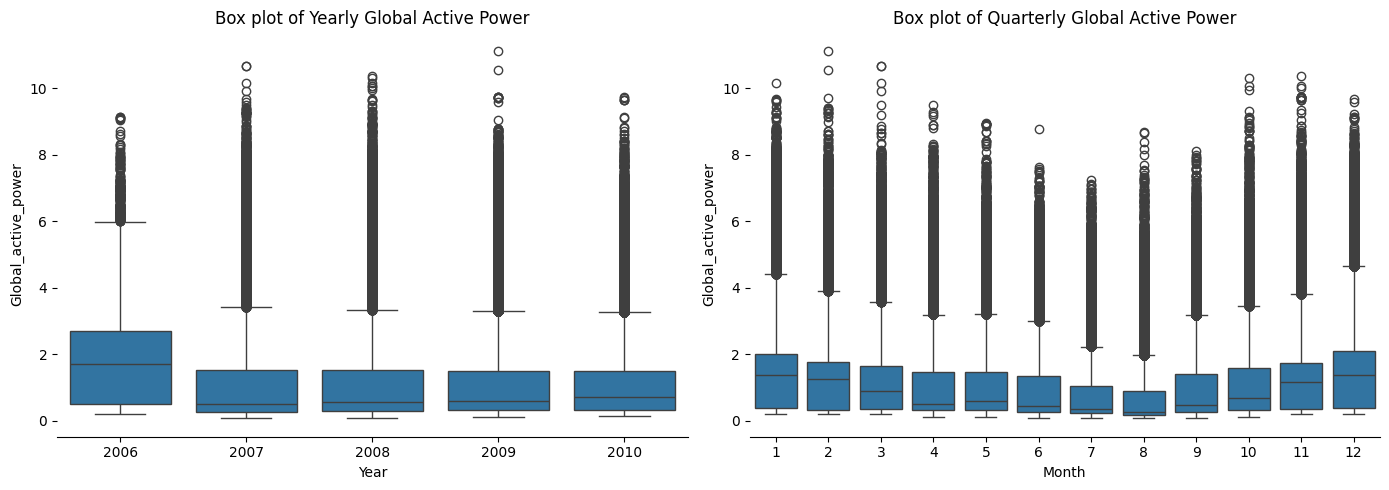

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_box_plots(data):
    """
    Generate box plots for yearly and quarterly global active power.


    """
    plt.figure(figsize=(14, 5))

    # Box plot for yearly global active power
    plt.subplot(1, 2, 1)
    plt.subplots_adjust(wspace=0.2)
    sns.boxplot(x="Year", y="Global_active_power", data=data)
    plt.xlabel('Year')
    plt.title('Box plot of Yearly Global Active Power')
    sns.despine(left=True)
    plt.tight_layout()

    # Box plot for quarterly global active power
    plt.subplot(1, 2, 2)
    sns.boxplot(x="Month", y="Global_active_power", data=data)
    plt.xlabel('Month')
    plt.title('Box plot of Quarterly Global Active Power')
    sns.despine(left=True)
    plt.tight_layout()

    # Display the plots
    plt.show()


plot_box_plots(timeseries_data_ffill)


Observation :- As we see Global Active Power Yearly and for year 2006 is large as compare to the other upcoming year.
As we see Global Active Power Quarterly their you see patterns before and after the month 7

This histogram provides insights into the distribution of voltage values. It can help identify the most common voltage levels and any outliers in the data.

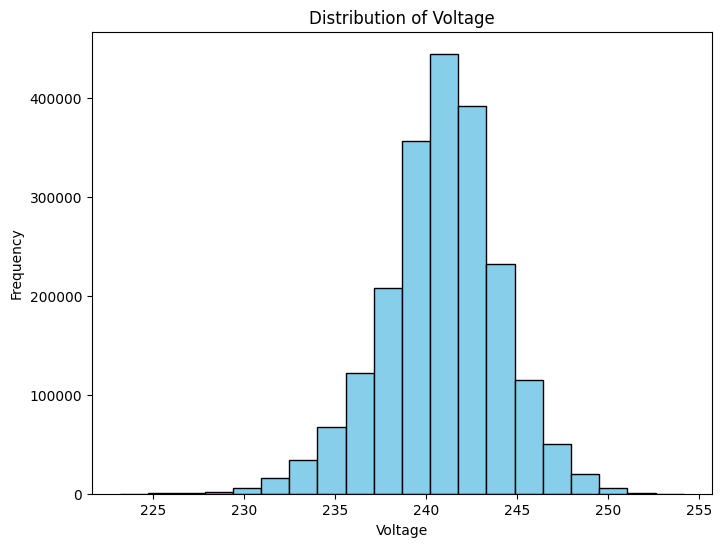

In [19]:
import matplotlib.pyplot as plt

def plot_voltage_distribution(data):
    """
    Generate a histogram for the distribution of voltage.

    """
    plt.figure(figsize=(8, 6))
    plt.hist(data['Voltage'], bins=20, color='skyblue', edgecolor='black')
    plt.xlabel('Voltage')
    plt.ylabel('Frequency')
    plt.title('Distribution of Voltage')
    plt.show()


plot_voltage_distribution(timeseries_data_ffill)


Distribution check of Global Active Power Consumption in Weekdays vs. Weekends

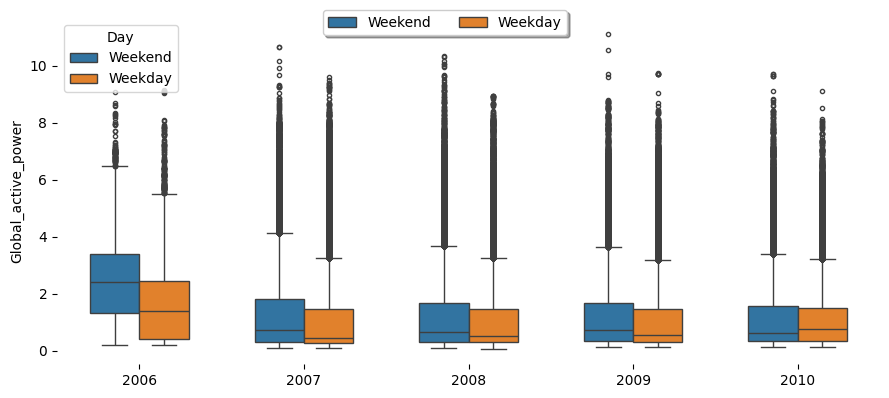

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_power_consumption_weekdays_vs_weekends(data):
    """
    Generate a boxplot comparing global active power consumption between weekdays and weekends.
    """
    dic = {1: 'Weekend', 0: 'Weekday'}
    data['Day'] = data['Is_holiday'].map(dic)

    a = plt.figure(figsize=(9, 4))
    plt1 = sns.boxplot(x='Year', y='Global_active_power', hue='Day', width=0.6, fliersize=3, data=data)
    a.legend(loc='upper center', bbox_to_anchor=(0.5, 1.00), shadow=True, ncol=2)
    sns.despine(left=True, bottom=True)
    plt.xlabel('')
    plt.tight_layout()


plot_power_consumption_weekdays_vs_weekends(timeseries_data_ffill)


Distribution check for count of weekdays and weekends present in features

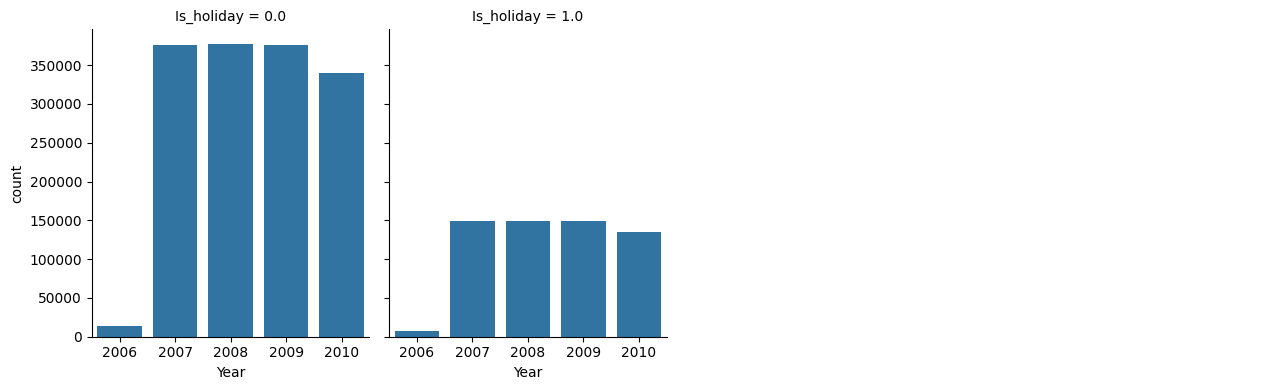

In [21]:
import seaborn as sns

def count_check_weekend_weekday(data):
    """
    Generate count plots for weekends and weekdays based on the 'Is_holiday' column.
    """
    g = sns.catplot(x="Year", col="Is_holiday", col_wrap=4, 
                    data=data[data.Is_holiday.notnull()], 
                    kind="count", height=4, aspect=.8)


count_check_weekend_weekday(timeseries_data_ffill)


Observation :- Count of weekdays is greater than weekand

'power_consumption':- Creates a new column named 'power_consumption' in the DataFrame.
eq1 - eq2:- Subtracts the calculated active power consumption (eq1) from the calculated sub-metering power consumption (eq2), resulting in the overall power consumption.
The new 'power_consumption' column now represents the difference between the active power consumption and the total power consumption for sub-metering. This could be useful for analyzing the distribution of power consumption in different categories within the dataset.

Here's a summary of the new columns:

'Global_active_power' (original active power values)
'power_consumption' (difference between active power and sub-metering power)

In [22]:
def create_power_consumption_variable(data):
    """
    Create a new variable 'power_consumption' based on the provided calculations.
    Returns:
    - DataFrame with the new 'power_consumption' variable added
    """
    eq1 = (data['Global_active_power'] * 1000 / 60)    # Calculate active power consumption in kilowatt-hour (kWh)
    eq2 = data['Sub_metering_1'] + data['Sub_metering_2'] + data['Sub_metering_3'] #This represents the total power consumption for sub-metering.
    data['power_consumption'] = eq1 - eq2
    return data

timeseries_data_ffill = create_power_consumption_variable(timeseries_data_ffill)
timeseries_data_ffill

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Year,Month,Day,Hour,Minute,Is_holiday,Light,power_consumption
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,2006,12,Weekend,17,24,1.0,1.0,52.266667
1,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,2006,12,Weekend,17,25,1.0,1.0,72.333333
2,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,2006,12,Weekend,17,26,1.0,1.0,70.566667
3,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,2006,12,Weekend,17,27,1.0,1.0,71.800000
4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,2006,12,Weekend,17,28,1.0,1.0,43.100000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2075254,26/11/2010,20:58:00,0.946,0.000,240.43,4.0,0.0,0.0,0.0,2010,11,Weekday,20,58,0.0,0.0,15.766667
2075255,26/11/2010,20:59:00,0.944,0.000,240.00,4.0,0.0,0.0,0.0,2010,11,Weekday,20,59,0.0,0.0,15.733333
2075256,26/11/2010,21:00:00,0.938,0.000,239.82,3.8,0.0,0.0,0.0,2010,11,Weekday,21,0,0.0,0.0,15.633333
2075257,26/11/2010,21:01:00,0.934,0.000,239.70,3.8,0.0,0.0,0.0,2010,11,Weekday,21,1,0.0,0.0,15.566667


In [23]:
def count_unique_days_in_year(data, year):
    """
    Count the total number of unique days in the specified year with at least one record.

    Returns:
    - Total number of days in the specified year with at least one record
    """
    data['Date'] = pd.to_datetime(data['Date'])
    df_year = data[data['Date'].dt.year == year]
    total_days = df_year['Date'].nunique()
    return total_days


total_days_2006 = count_unique_days_in_year(timeseries_data_ffill, 2006)
print("Total number of days in 2006 with at least one record:", total_days_2006)


Total number of days in 2006 with at least one record: 16


/tmp/ipykernel_9169/135949848.py:8: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['Date'] = pd.to_datetime(data['Date'])


Observation :- As we have only 16 records for 2006 year, which may deceive our analysis. As we will analyse the data yearly and this 16 records will not help us understand the data flow for the year 2006. We will remove those 16 records of 2006 and move ahead for analysis of remaining four year data.

Reason of unavailabilty of data for 2006 could be, data collection might have started for analysis if from 16th december 2006 or else the previous data might have lost due to some serious problem or due to unavailabilty of proper required data for analysis like missing of some features or so.


#### Filter records for the year greater than 2006
As we have data for each minute for each day, we will group the data day-wise, so we will get dataset for per day (where all each minute data is grouped for same date)
Power_consumption: It represents the active energy consumed every day (in watt hour) in the household by electrical equipment not measured in sub-meterings 1, 2 and 3.

In [24]:
def filter_and_group(data, start_year):
    """
    Filter records for the year greater than the specified year,
    reset the index, and group by Date while summing the values.


    Returns:
    - DataFrame with records for years greater than start_year,
      reset index, and grouped by Date with summing values
    """
    filtered_data = data[data['Date'].dt.year > start_year]
    filtered_data = filtered_data.reset_index(drop=True)
    grouped_data = filtered_data.groupby(['Date']).sum()
    return filtered_data, grouped_data

 
df_filtered, df_data = filter_and_group(timeseries_data_ffill, 2006)
print("Filtered Data:")
print(df_filtered.head())
print("\nGrouped Data:")
print(df_data.head())


Filtered Data:
        Date      Time  Global_active_power  Global_reactive_power  Voltage  \
0 2007-01-01  00:00:00                2.580                  0.136   241.97   
1 2007-01-01  00:01:00                2.552                  0.100   241.75   
2 2007-01-01  00:02:00                2.550                  0.100   241.64   
3 2007-01-01  00:03:00                2.550                  0.100   241.71   
4 2007-01-01  00:04:00                2.554                  0.100   241.98   

   Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  Year  \
0              10.6             0.0             0.0             0.0  2007   
1              10.4             0.0             0.0             0.0  2007   
2              10.4             0.0             0.0             0.0  2007   
3              10.4             0.0             0.0             0.0  2007   
4              10.4             0.0             0.0             0.0  2007   

   Month      Day  Hour  Minute  Is_holiday  Li

In [25]:
def calculate_power_consumption_statistics(data):
    """ Calculate power consumption statistics for the given DataFrame."""
    df_power_consumption = data[['power_consumption']]
    #power_consumption_statistics = df_power_consumption.groupby(df_power_consumption.index.year).describe()
    return df_power_consumption


df_power_consumption = calculate_power_consumption_statistics(df_data)
(df_power_consumption.head())


,power_consumption
Date,
2007-01-01,39584.733333
2007-01-02,14243.933333
2007-01-03,11791.900000
2007-01-04,34779.533333
2007-01-05,35758.733333


Statistics of power consumption yearly

In [26]:
df_power_consumption.groupby(df_power_consumption.index.year).describe()

power_consumption                                                       \
                 count          mean          std          min          25%   
Date                                                                          
2007             365.0  14316.716530  7141.760475  3969.333333  9122.500000   
2008             366.0  13635.700638  6200.780172  2313.633333  9383.325000   
2009             365.0  12728.079726  4731.511575  3804.100000  9443.333333   
2010             330.0  11980.816061  3963.001990  2064.000000  9201.950000   

                                                
               50%           75%           max  
Date                                            
2007  12678.133333  17471.766667  40280.600000  
2008  13211.400000  17616.600000  38598.966667  
2009  12650.666667  15607.100000  34344.000000  
2010  11767.733333  14607.150000  22103.766667

Distribution check of power consumption yearly


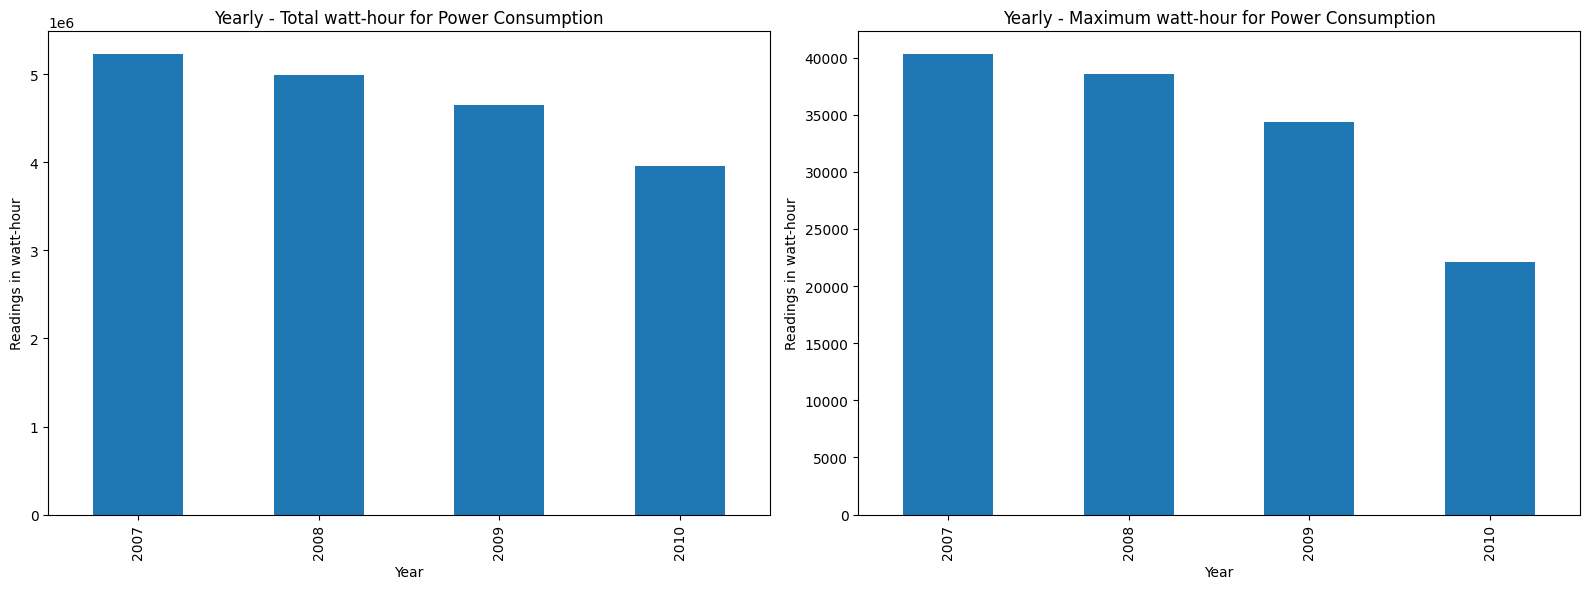

In [27]:
import matplotlib.pyplot as plt

def plot_power_consumption_statistics(df):
    # Group by year and calculate total and maximum watt-hour
    yearly_statistics = df.groupby(df.index.year).agg({'power_consumption': ['sum', 'max']})

    # Plot total watt-hour
    plt.figure(figsize=(16, 6))
    plt.subplot(1, 2, 1)
    yearly_statistics['power_consumption', 'sum'].plot(kind="bar", xlabel='Year', ylabel='Readings in watt-hour',
                                                       title="Yearly - Total watt-hour for Power Consumption")
    plt.tight_layout()

    # Plot maximum watt-hour
    plt.subplot(1, 2, 2)
    yearly_statistics['power_consumption', 'max'].plot(kind="bar", xlabel='Year', ylabel='Readings in watt-hour',
                                                       title="Yearly - Maximum watt-hour for Power Consumption")
    plt.tight_layout()

    plt.show()

# Call the function with your DataFrame
plot_power_consumption_statistics(df_power_consumption)


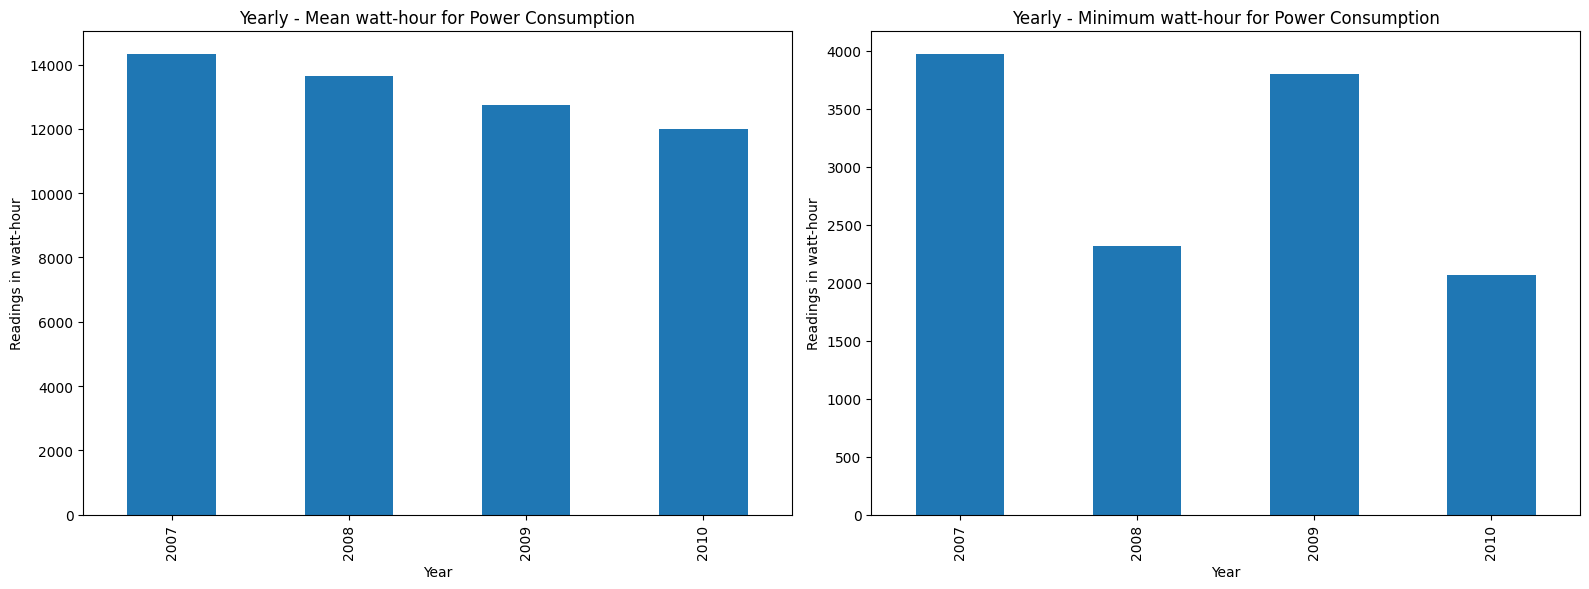

In [28]:
import matplotlib.pyplot as plt

def plot_power_consumption_statistics(df):
    # Group by year and calculate mean and minimum watt-hour
    yearly_statistics = df.groupby(df.index.year).agg({'power_consumption': ['mean', 'min']})

    # Plot mean watt-hour
    plt.figure(figsize=(16, 6))
    plt.subplot(1, 2, 1)
    yearly_statistics['power_consumption', 'mean'].plot(kind="bar", xlabel='Year', ylabel='Readings in watt-hour',
                                                        title="Yearly - Mean watt-hour for Power Consumption")
    plt.tight_layout()

    # Plot minimum watt-hour
    plt.subplot(1, 2, 2)
    yearly_statistics['power_consumption', 'min'].plot(kind="bar", xlabel='Year', ylabel='Readings in watt-hour',
                                                       title="Yearly - Minimum watt-hour for Power Consumption")
    plt.tight_layout()

    plt.show()

# Call the function with your DataFrame
plot_power_consumption_statistics(df_power_consumption)


As per the analysis we see that:-

1) Total power consumption range is 4000000 - ~5000000 watt hour. i.e., 4000 - ~5000 kWH
2) Maximum Power consumption was done in year 2007
3) Minimum power cosumption was done in year 2010

Distribution check for power consumption monthly

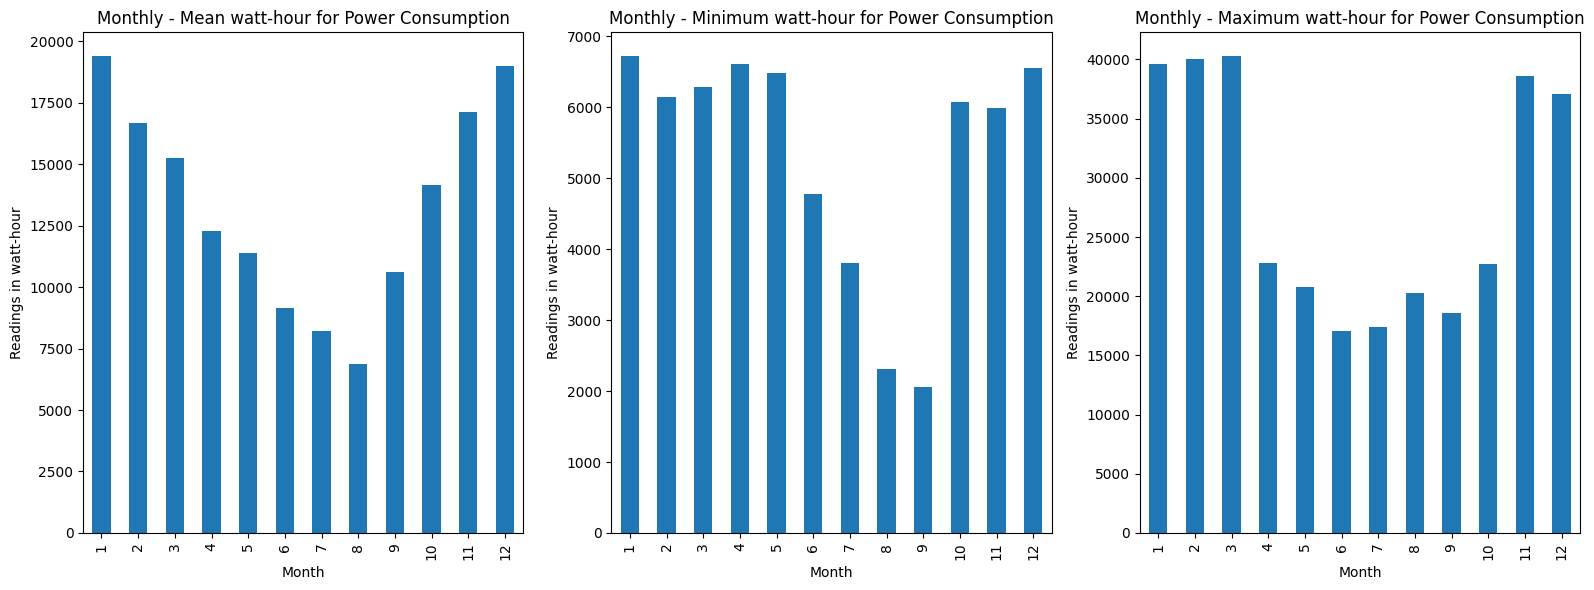

In [29]:
import matplotlib.pyplot as plt

def plot_monthly_power_consumption_statistics(df):
    # Group by month and calculate mean, minimum, and maximum watt-hour
    monthly_statistics = df.groupby(df.index.month).agg({'power_consumption': ['mean', 'min', 'max']})

    # Plot mean watt-hour
    plt.figure(figsize=(16, 6))
    plt.subplot(1, 3, 1)
    monthly_statistics['power_consumption', 'mean'].plot(kind="bar", xlabel='Month', ylabel='Readings in watt-hour',
                                                         title="Monthly - Mean watt-hour for Power Consumption")
    plt.tight_layout()

    # Plot minimum watt-hour
    plt.subplot(1, 3, 2)
    monthly_statistics['power_consumption', 'min'].plot(kind="bar", xlabel='Month', ylabel='Readings in watt-hour',
                                                        title="Monthly - Minimum watt-hour for Power Consumption")
    plt.tight_layout()

    # Plot maximum watt-hour
    plt.subplot(1, 3, 3)
    monthly_statistics['power_consumption', 'max'].plot(kind="bar", xlabel='Month', ylabel='Readings in watt-hour',
                                                        title="Monthly - Maximum watt-hour for Power Consumption")
    plt.tight_layout()

    plt.show()

# Call the function with your DataFrame
plot_monthly_power_consumption_statistics(df_power_consumption)


Distribution check for power consumption weekly

/tmp/ipykernel_9169/3676266965.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Week'] = df.index.isocalendar().week


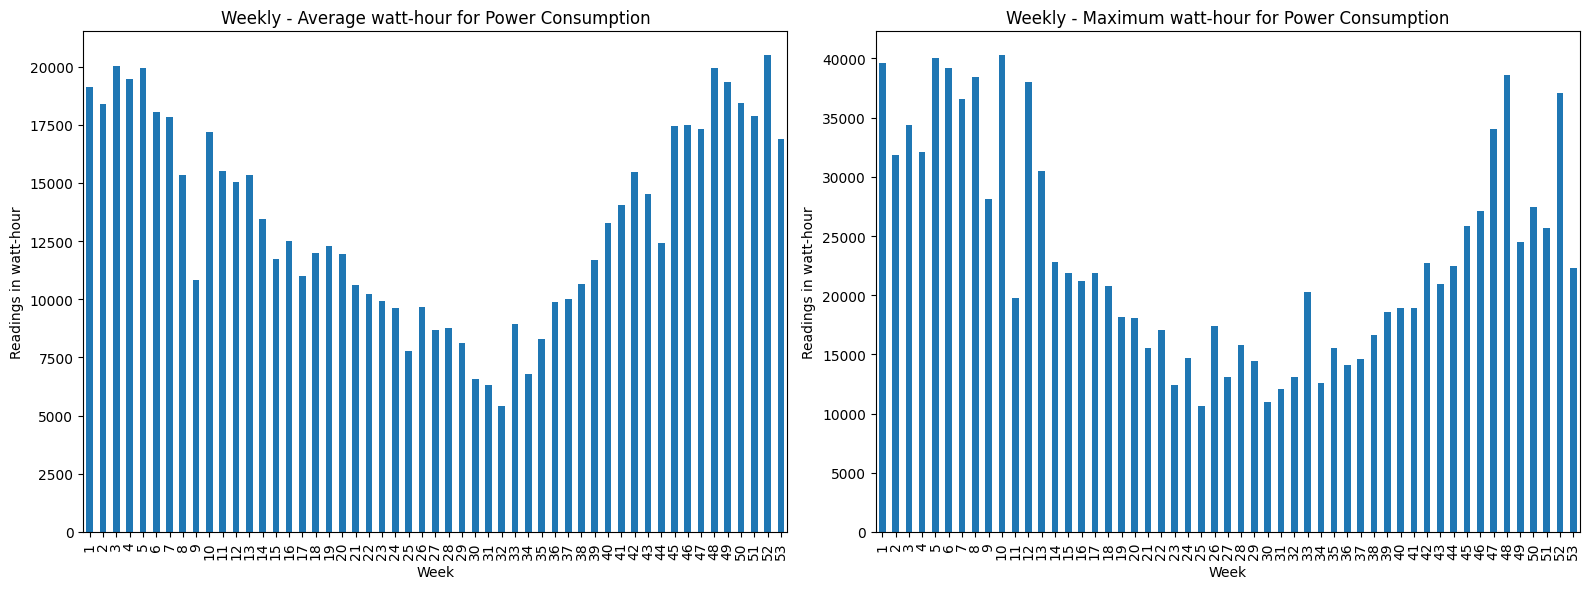

In [30]:
import matplotlib.pyplot as plt

def plot_weekly_power_consumption_statistics(df):
    # Assuming index is not already in datetime format, convert it
    df.index = pd.to_datetime(df.index)

    # Extract the ISO week from the datetime index
    df['Week'] = df.index.isocalendar().week

    # Group by week and calculate the mean and maximum
    weekly_statistics = df.groupby('Week').agg({'power_consumption': ['mean', 'max']})

    # Plotting the bar charts for mean and maximum
    plt.figure(figsize=(16, 6))

    # Plot weekly mean
    plt.subplot(1, 2, 1)
    weekly_statistics['power_consumption', 'mean'].plot(kind="bar", xlabel='Week', ylabel='Readings in watt-hour',
                                                         title="Weekly - Average watt-hour for Power Consumption")
    plt.tight_layout()

    # Plot weekly maximum
    plt.subplot(1, 2, 2)
    weekly_statistics['power_consumption', 'max'].plot(kind="bar", xlabel='Week', ylabel='Readings in watt-hour',
                                                        title="Weekly - Maximum watt-hour for Power Consumption")
    plt.tight_layout()

    plt.show()

# Call the function with your DataFrame
plot_weekly_power_consumption_statistics(df_power_consumption)


Distribution check for Sub_Meetring

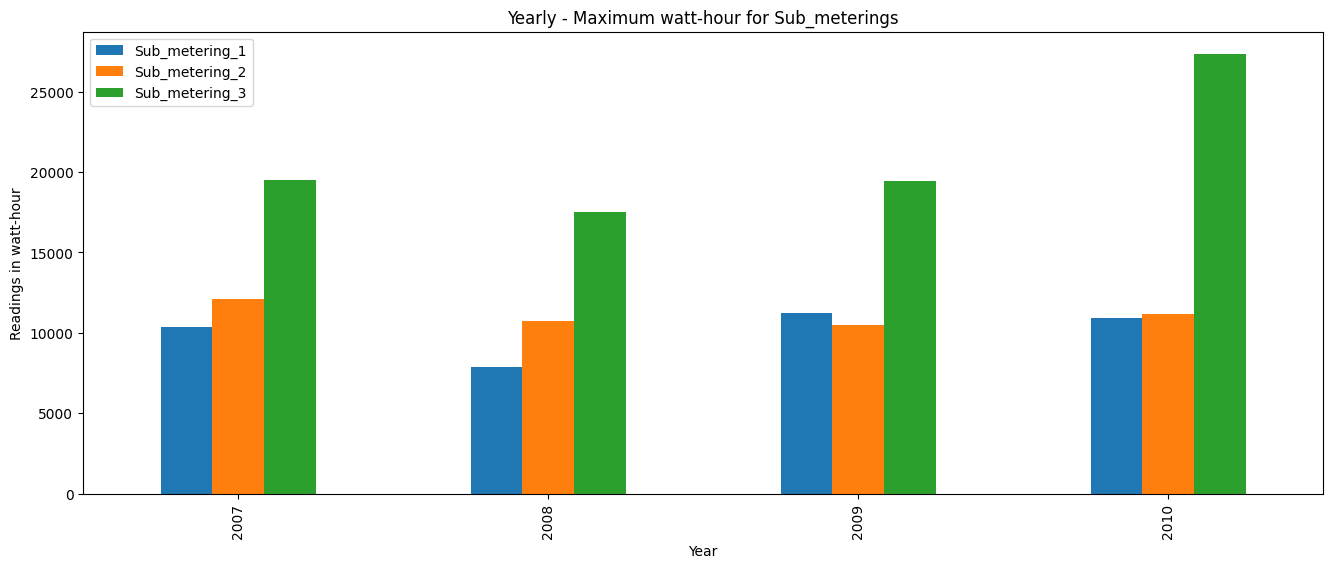

In [31]:
import matplotlib.pyplot as plt

def plot_yearly_max_sub_meterings(data, columns=['Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']):
    # Assuming index is not already in datetime format, convert it
    data.index = pd.to_datetime(data.index)

    # Extract the specified sub-metering columns
    df_sub_meterings = data[columns]

    # Group by year and calculate the maximum for sub_meterings
    yearly_max = df_sub_meterings.groupby(df_sub_meterings.index.year).max()

    # Plotting the bar chart for maximum
    yearly_max.plot(kind="bar", xlabel='Year', ylabel='Readings in watt-hour',
                    title="Yearly - Maximum watt-hour for Sub_meterings", figsize=(16, 6))
    plt.show()

# Call the function with your DataFrame
plot_yearly_max_sub_meterings(df_data)



Observation :-  Yearly Maximum watt-hour for Sub_metering_3 is greater than other

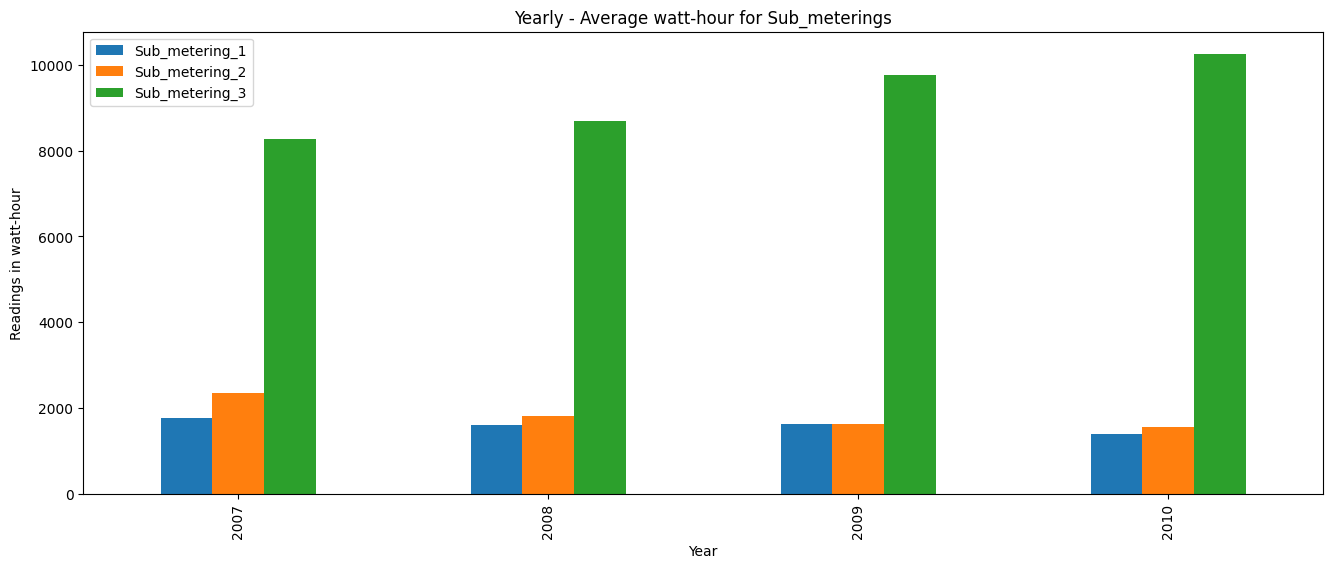

In [32]:
def plot_yearly_max_sub_meterings(data, columns=['Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']):
    # Assuming index is not already in datetime format, convert it
    data.index = pd.to_datetime(data.index)

    # Extract the specified sub-metering columns
    df_sub_meterings = data[columns]

    # Group by year and calculate the maximum for sub_meterings
    yearly_max = df_sub_meterings.groupby(df_sub_meterings.index.year).mean()

    # Plotting the bar chart for maximum
    yearly_max.plot(kind="bar", xlabel='Year', ylabel='Readings in watt-hour',
                    title="Yearly - Average watt-hour for Sub_meterings", figsize=(16, 6))
    plt.show()

# Call the function with your DataFrame
plot_yearly_max_sub_meterings(df_data)

Observations :- Yearly Average watt-hour for Sub_metering_3 is greater than other

#### Seasonality Check
 
 Seasonality in time series analysis refers to the presence of recurring patterns or fluctuations in a dataset that follow a regular and predictable schedule. These patterns often repeat over fixed intervals, such as daily, weekly, monthly, or yearly cycles. Detecting and understanding seasonality is crucial for forecasting and analyzing time-dependent trends, as it helps identify the periodic variations that can influence the overall behavior of the time series data. Seasonal patterns can be caused by various factors, such as weather, holidays, or economic cycles, and addressing seasonality is an essential step in developing accurate time series models.

In [33]:
# Resample to monthly frequency and sum
ts = df_data['power_consumption'].resample('MS').sum()

# Display the first few rows of the resampled series
print(ts.head())

Date
2007-01-01    684969.166667
2007-02-01    559086.966667
2007-03-01    525150.900000
2007-04-01    346888.366667
2007-05-01    356164.200000
Freq: MS, Name: power_consumption, dtype: float64


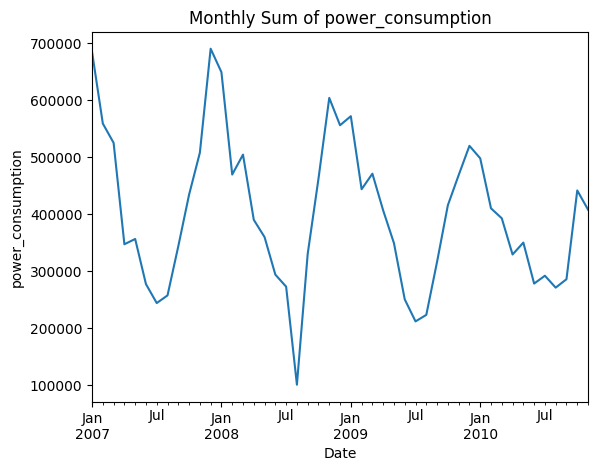

In [34]:
import matplotlib.pyplot as plt

def plot_monthly_sum(data, column='power_consumption'):
   
    # Resample to monthly frequency and sum
    ts = data[column].resample('MS').sum()

    # Plot with y-axis label
    ts.plot(ylabel=column)

    # Display the plot
    plt.title(f'Monthly Sum of {column}')
    plt.show()

# Call the function with your DataFrame
plot_monthly_sum(df_data)


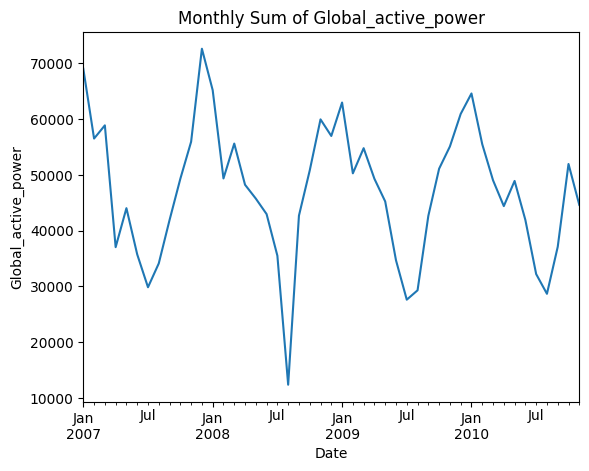

In [35]:
def plot_monthly_sum(data, column='Global_active_power'):
   
    # Resample to monthly frequency and sum
    ts_1 = data[column].resample('MS').sum()

    # Plot with y-axis label
    ts_1.plot(ylabel=column)

    # Display the plot
    plt.title(f'Monthly Sum of {column}')
    plt.show()

# Call the function with your DataFrame
plot_monthly_sum(df_data)

Observations:- As we see from the above both the plots their is no regular periodic moment, So their is not seasonality

In [36]:
ts_3 = df_data['Global_active_power'].resample('MS').sum()
ts_3

Date
2007-01-01    69017.230
2007-02-01    56494.978
2007-03-01    58862.574
2007-04-01    37013.182
2007-05-01    44008.872
2007-06-01    35721.508
2007-07-01    29825.472
2007-08-01    34100.908
2007-09-01    41879.874
2007-10-01    49280.126
2007-11-01    55922.242
2007-12-01    72605.526
2008-01-01    65173.836
2008-02-01    49337.980
2008-03-01    55592.198
2008-04-01    48209.992
2008-05-01    45724.956
2008-06-01    42944.792
2008-07-01    35478.298
2008-08-01    12344.406
2008-09-01    42667.792
2008-10-01    50769.732
2008-11-01    59935.032
2008-12-01    56958.192
2009-01-01    62955.518
2009-02-01    50256.926
2009-03-01    54767.224
2009-04-01    49276.824
2009-05-01    45212.136
2009-06-01    34665.680
2009-07-01    27595.972
2009-08-01    29275.988
2009-09-01    42633.234
2009-10-01    51089.372
2009-11-01    55070.590
2009-12-01    60908.762
2010-01-01    64579.760
2010-02-01    55477.012
2010-03-01    49011.292
2010-04-01    44378.466
2010-05-01    48894.170
2010-06-01 

### Stationarity Check

Stationarity in time series is defined as the mean and variance of the data it has constant over the period of time, it does not vary much.
Stationarity describes that the time-series has

1) constant mean and mean is not time-dependent
2) constant variance and variance is not time-dependent
3) constant covariance and covariance is not time-dependent
If a time series has a specific (stationary) behavior over a given time interval, then it can be assumed that the time series will behave the same at a later time.

Time series with trend and/or seasonality are not stationary. Trend indicates that the mean is not constant over time and seasonality indicates that the variance is not constant over time.

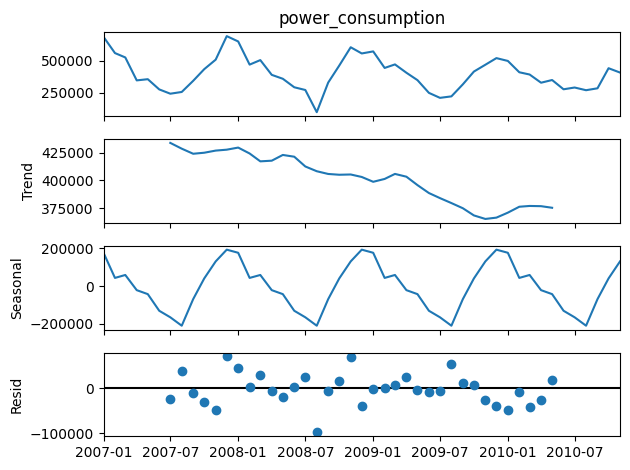

In [37]:
import statsmodels.api as sm
decomposition = sm.tsa.seasonal_decompose(ts, model='additive')
fig = decomposition.plot()
plt.show()

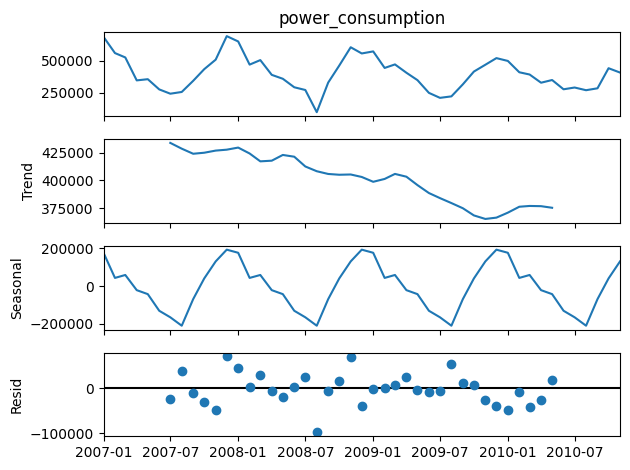

In [38]:
import statsmodels.api as sm


def plot_seasonal_decomposition(data):
  
    
    # Decompose the time series
    decomposition = sm.tsa.seasonal_decompose(data, model='additive')

    # Plot the decomposition
    fig = decomposition.plot()
    plt.show()

# Call the function with your DataFrame
plot_seasonal_decomposition(ts)


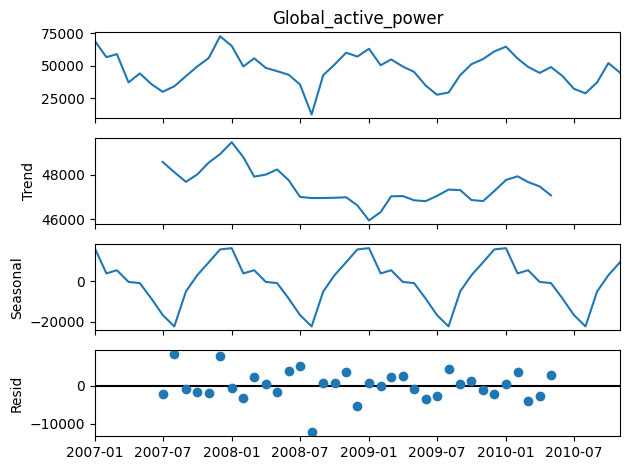

In [39]:

def plot_seasonal_decomposition(data):
  
    
    # Decompose the time series
    decomposition = sm.tsa.seasonal_decompose(data, model='additive')

    # Plot the decomposition
    fig = decomposition.plot()
    plt.show()

# Call the function with your DataFrame
plot_seasonal_decomposition(ts_3)


Observations:- If graph is not following trend then the series or data is stationary and as we see from the above their is no fix trend.

In [40]:
from statsmodels.tsa.stattools import adfuller

In [41]:
adf_1 = adfuller(ts_3)
print("pvalue of adfullerfuller test is:-",adf_1[1])

pvalue of adfullerfuller test is:- 0.0004162485160201104


In [42]:
from statsmodels.tsa.stattools import adfuller

def adf_test(time_series):
    """
    Perform Augmented Dickey-Fuller test on a given time series..
    """
    adf_result = adfuller(time_series)
    p_value = adf_result[1]

    # Check if p-value is less than or equal to 0.05
    if p_value <= 0.05:
        result = ("The time series is stationary.",p_value)
    else:
        result = ("The time series is not stationary.",p_value)

    return result


stationary_result = adf_test(ts_3)
print(stationary_result)


('The time series is stationary.', 0.0004162485160201104)


In [43]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

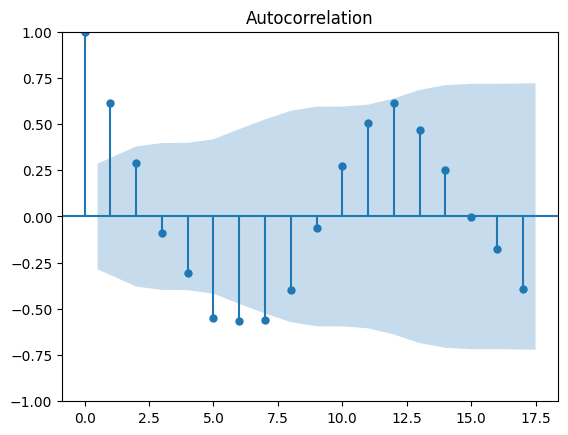

In [44]:
acf = plot_acf(ts_3)

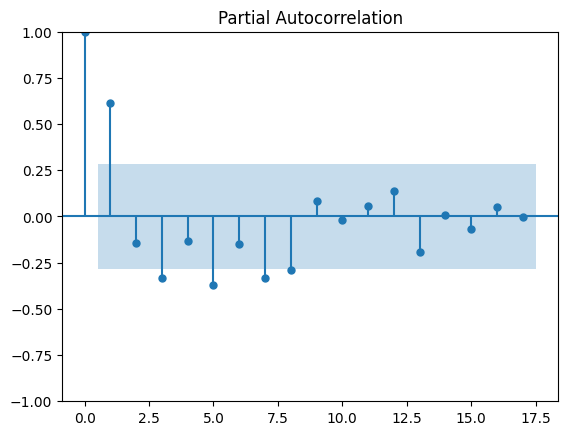

In [45]:
pacf_1 = plot_pacf(ts_3)

In [46]:
train = ts_3[:30]
test = ts_3[30:]

#### ARIMA

In [47]:
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings("ignore")
model = ARIMA(train, order = (5,0,5)).fit()

In [48]:
pred = model.predict(start=len(train), end=(len(ts_3)-1))
pred.head()

2009-07-01    47171.333500
2009-08-01    43711.753006
2009-09-01    46229.669131
2009-10-01    50677.258315
2009-11-01    56843.816200
Freq: MS, Name: predicted_mean, dtype: float64

In [49]:
from sklearn.metrics import mean_squared_error
import numpy as np

In [50]:
error = np.sqrt(mean_squared_error(test,pred))
error

10329.588156502361

In [51]:
test.mean(), np.sqrt(test.var())

(45014.731529411765, 11247.995879030062)

In [52]:
one_sd_above_mean = test.mean() + 1*np.sqrt(test.var())
one_sd_above_mean

56262.72740844183

<Axes: xlabel='Date'>

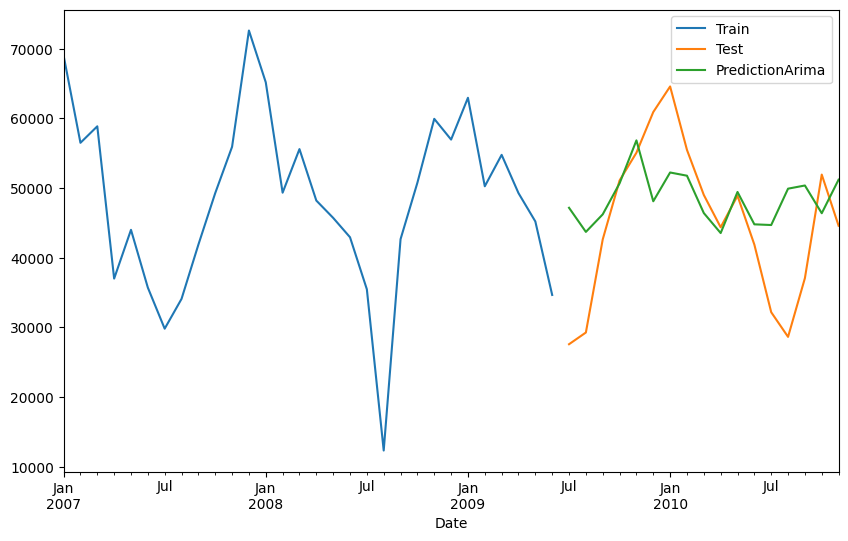

In [53]:

train.plot(legend=True, label='Train',figsize=(10,6))
test.plot(legend=True, label='Test')
pred.plot(legend=True, label='PredictionArima')

<Axes: xlabel='Date'>

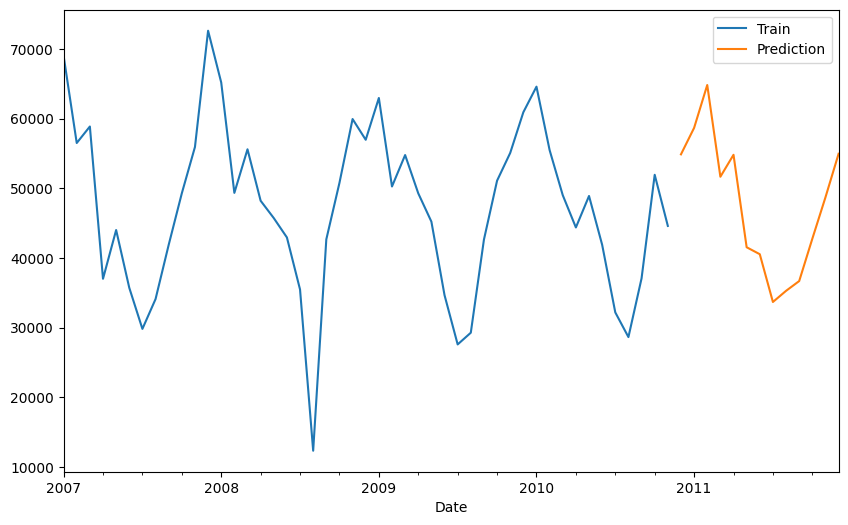

In [54]:
# Predict future data

final_model = ARIMA(ts_3,order=(5,0,5)).fit()
prediction = final_model.predict(len(ts_3), len(ts_3)+12)
ts_3.plot(legend=True, label='Train',figsize=(10,6))
prediction.plot(legend=True, label='Prediction')

In [55]:
df_data

,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Year,Month,Day,Hour,Minute,Is_holiday,Light,power_consumption
Date,,,,,,,,,,,,,,,,
2007-01-01,00:00:0000:01:0000:02:0000:03:0000:04:0000:05:...,2749.004,148.166,345785.73,11400.4,0.0,352.0,5880.0,2890080,1440,WeekdayWeekdayWeekdayWeekdayWeekdayWeekdayWeek...,16560,42480,0.0,720.0,39584.733333
2007-01-02,00:00:0000:01:0000:02:0000:03:0000:04:0000:05:...,1269.236,190.342,348399.04,5348.2,0.0,348.0,6562.0,2890080,1440,WeekdayWeekdayWeekdayWeekdayWeekdayWeekdayWeek...,16560,42480,0.0,720.0,14243.933333
2007-01-03,00:00:0000:01:0000:02:0000:03:0000:04:0000:05:...,1014.054,196.728,350722.21,4340.2,0.0,344.0,4765.0,2890080,1440,WeekdayWeekdayWeekdayWeekdayWeekdayWeekdayWeek...,16560,42480,0.0,720.0,11791.900000
2007-01-04,00:00:0000:01:0000:02:0000:03:0000:04:0000:05:...,3259.412,202.302,345240.43,13648.6,1051.0,7597.0,10896.0,2890080,1440,WeekdayWeekdayWeekdayWeekdayWeekdayWeekdayWeek...,16560,42480,0.0,720.0,34779.533333
2007-01-05,00:00:0000:01:0000:02:0000:03:0000:04:0000:05:...,2713.364,173.154,346313.90,11354.6,1483.0,379.0,7602.0,2890080,1440,WeekdayWeekdayWeekdayWeekdayWeekdayWeekdayWeek...,16560,42480,0.0,720.0,35758.733333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2010-11-22,00:00:0000:01:0000:02:0000:03:0000:04:0000:05:...,2041.536,142.354,345883.85,8660.4,4855.0,2110.0,10136.0,2894400,15840,WeekdayWeekdayWeekdayWeekdayWeekdayWeekdayWeek...,16560,42480,0.0,720.0,16924.600000
2010-11-23,00:00:0000:01:0000:02:0000:03:0000:04:0000:05:...,1577.536,137.450,346428.76,6731.2,1871.0,458.0,7611.0,2894400,15840,WeekdayWeekdayWeekdayWeekdayWeekdayWeekdayWeek...,16560,42480,0.0,720.0,16352.266667
2010-11-24,00:00:0000:01:0000:02:0000:03:0000:04:0000:05:...,1796.248,132.460,345644.59,7559.4,1096.0,2848.0,12224.0,2894400,15840,WeekdayWeekdayWeekdayWeekdayWeekdayWeekdayWeek...,16560,42480,0.0,720.0,13769.466667


In [56]:
data_f = df_data.copy()
data_f = data_f.drop(['Time','Day','Is_holiday','Light','power_consumption'], axis=1)
data_f.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Year,Month,Hour,Minute
Date,,,,,,,,,,,
2007-01-01,2749.004,148.166,345785.73,11400.4,0.0,352.0,5880.0,2890080,1440,16560,42480
2007-01-02,1269.236,190.342,348399.04,5348.2,0.0,348.0,6562.0,2890080,1440,16560,42480
2007-01-03,1014.054,196.728,350722.21,4340.2,0.0,344.0,4765.0,2890080,1440,16560,42480
2007-01-04,3259.412,202.302,345240.43,13648.6,1051.0,7597.0,10896.0,2890080,1440,16560,42480
2007-01-05,2713.364,173.154,346313.90,11354.6,1483.0,379.0,7602.0,2890080,1440,16560,42480


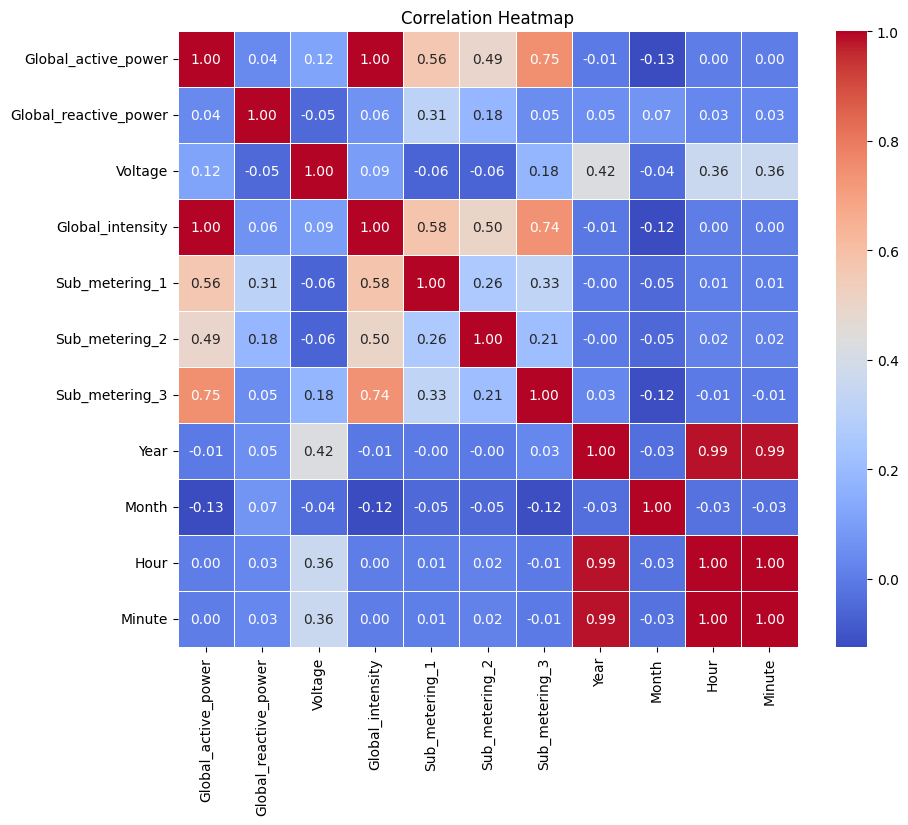

In [57]:
plt.figure(figsize=(10, 8))
sns.heatmap(data_f.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

In [58]:
data_f.columns

Index(['Global_active_power', 'Global_reactive_power', 'Voltage',
       'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3', 'Year', 'Month', 'Hour', 'Minute'],
      dtype='object')

In [59]:
data_f.reset_index(inplace=True)
data_f.columns


Index(['Date', 'Global_active_power', 'Global_reactive_power', 'Voltage',
       'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3', 'Year', 'Month', 'Hour', 'Minute'],
      dtype='object')

In [60]:
data_f['Date']

0      2007-01-01
1      2007-01-02
2      2007-01-03
3      2007-01-04
4      2007-01-05
          ...    
1421   2010-11-22
1422   2010-11-23
1423   2010-11-24
1424   2010-11-25
1425   2010-11-26
Name: Date, Length: 1426, dtype: datetime64[ns]

In [61]:
data_f = data_f.drop(['Year','Hour','Minute','Month'],axis=1)
data_f.columns

Index(['Date', 'Global_active_power', 'Global_reactive_power', 'Voltage',
       'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'],
      dtype='object')

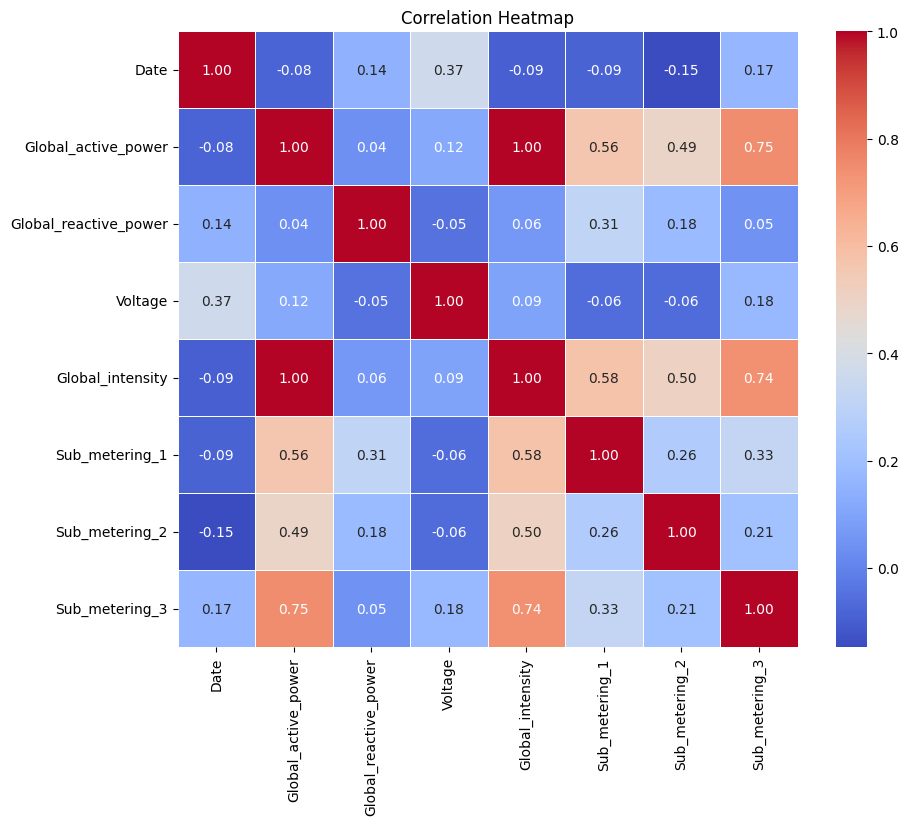

In [62]:
plt.figure(figsize=(10, 8))
sns.heatmap(data_f.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

In [63]:
train_1 = data_f.loc[df_data.index < '2009-01-01']
test_1 = data_f.loc[df_data.index > '2009-01-01']

In [64]:
print(train_1.shape)
print(test_1.shape)

(731, 8)
(694, 8)


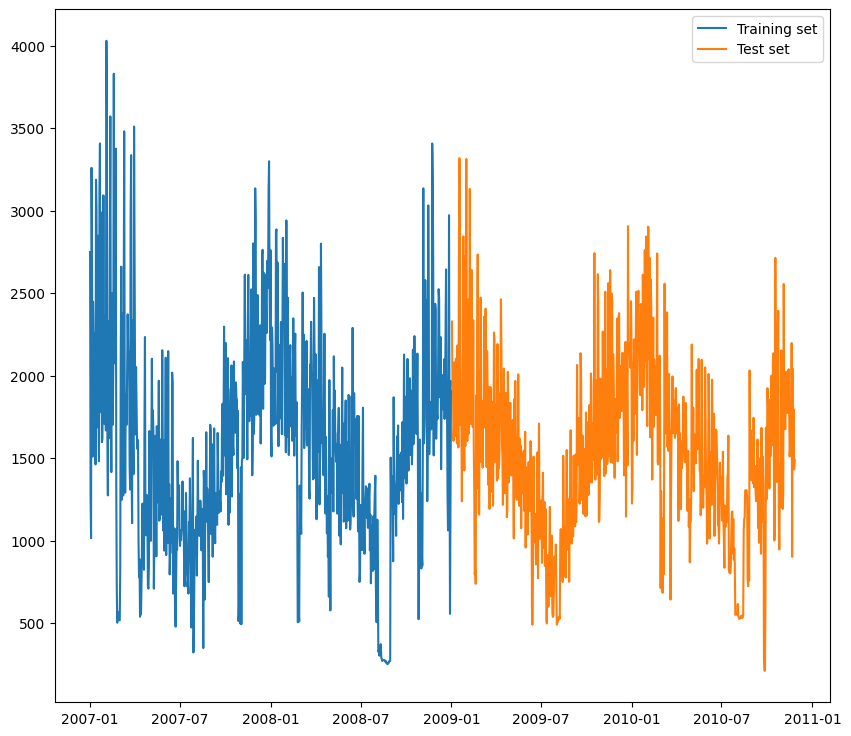

In [65]:
fig, ax = plt.subplots(figsize=(10, 9))
ax.plot(train_1['Date'], train_1['Global_active_power'], label='Training set')
ax.plot(test_1['Date'], test_1['Global_active_power'], label='Test set')
ax.legend()
plt.show()

#### VAR 

In [66]:
from statsmodels.tsa.statespace.varmax import VARMAX
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import grangercausalitytests

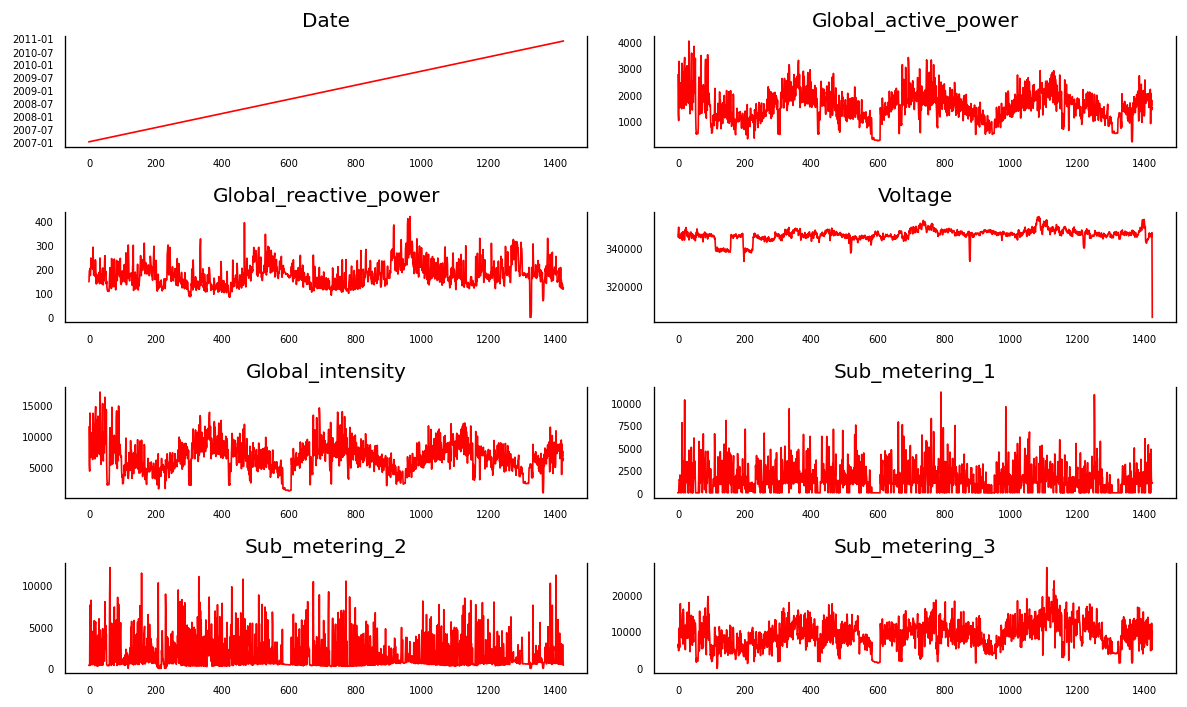

In [67]:
fig, axes = plt.subplots(nrows=4, ncols=2, dpi= 120, figsize=(10,6))
for i, ax in enumerate(axes.flatten()):
    data = data_f[data_f.columns[i]]
    ax.plot(data, color='red', linewidth = 1)
    
    ax.set_title(data_f.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines['top'].set_alpha(0)
    ax.tick_params(labelsize=6)
plt.tight_layout()

                         

In [68]:
# Assuming 'data_f' is your DataFrame
for column in data_f.columns[1:]:  # Exclude the 'Date' column
    # Extract the time series data for the current column
    ts = data_f[column]

    # Perform Augmented Dickey-Fuller test
    result = adfuller(ts)

    # Print the p-value and check for stationarity
    print(f'Column: {column}, p-value: {result[1]}')
    if result[1] <= 0.05:
        print("The time series is likely stationary.")
    else:
        print("The time series is likely non-stationary.")
    print('\n')

Column: Global_active_power, p-value: 0.0027297572286949148
The time series is likely stationary.


Column: Global_reactive_power, p-value: 0.0006917495802199753
The time series is likely stationary.


Column: Voltage, p-value: 0.06697936661657372
The time series is likely non-stationary.


Column: Global_intensity, p-value: 0.001773421311660851
The time series is likely stationary.


Column: Sub_metering_1, p-value: 4.6847266502051405e-06
The time series is likely stationary.


Column: Sub_metering_2, p-value: 1.934599128898704e-05
The time series is likely stationary.


Column: Sub_metering_3, p-value: 0.0004277270149017239
The time series is likely stationary.




In [69]:
print("global_intensity causes Global_active_power?\n")
print('*'*50)
granger_1 = grangercausalitytests(data_f[['Global_active_power','Global_intensity']],3)


global_intensity causes Global_active_power?

**************************************************

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=62.4501 , p=0.0000  , df_denom=1422, df_num=1
ssr based chi2 test:   chi2=62.5818 , p=0.0000  , df=1
likelihood ratio test: chi2=61.2466 , p=0.0000  , df=1
parameter F test:         F=62.4501 , p=0.0000  , df_denom=1422, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=32.5121 , p=0.0000  , df_denom=1419, df_num=2
ssr based chi2 test:   chi2=65.2533 , p=0.0000  , df=2
likelihood ratio test: chi2=63.8024 , p=0.0000  , df=2
parameter F test:         F=32.5121 , p=0.0000  , df_denom=1419, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=13.0128 , p=0.0000  , df_denom=1416, df_num=3
ssr based chi2 test:   chi2=39.2313 , p=0.0000  , df=3
likelihood ratio test: chi2=38.7002 , p=0.0000  , df=3
parameter F test:         F=13.0128 , p=0.0000  , df_denom=1416, 

In [70]:
print('\n Global_active_power causes Global_intensity?\n')
print('*'*50)
granger_2 = grangercausalitytests(data_f[['Global_intensity','Global_active_power']],3)


 Global_active_power causes Global_intensity?

**************************************************

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=58.5965 , p=0.0000  , df_denom=1422, df_num=1
ssr based chi2 test:   chi2=58.7202 , p=0.0000  , df=1
likelihood ratio test: chi2=57.5426 , p=0.0000  , df=1
parameter F test:         F=58.5965 , p=0.0000  , df_denom=1422, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=30.7499 , p=0.0000  , df_denom=1419, df_num=2
ssr based chi2 test:   chi2=61.7165 , p=0.0000  , df=2
likelihood ratio test: chi2=60.4165 , p=0.0000  , df=2
parameter F test:         F=30.7499 , p=0.0000  , df_denom=1419, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=12.6288 , p=0.0000  , df_denom=1416, df_num=3
ssr based chi2 test:   chi2=38.0736 , p=0.0000  , df=3
likelihood ratio test: chi2=37.5731 , p=0.0000  , df=3
parameter F test:         F=12.6288 , p=0.0000  , df_denom=1416

In [71]:
mod_df = data_f[['Global_active_power','Global_reactive_power','Voltage','Global_intensity','Sub_metering_1','Sub_metering_2','Sub_metering_3']]
print(mod_df.shape)

(1426, 7)


In [ ]:
# from sklearn.model_selection import train_test_split

# # Assuming your dataframe is named 'df'
# train_df, test_df = train_test_split(data_f, test_size=0.2, random_state=42)

# # Display the shapes of the resulting dataframes
# print("Train set shape:", train_df.shape)
# print("Test set shape:", test_df.shape)


In [ ]:
# var_model = VAR(train_df)

# fitted_model = var_model.fit(0,)
# print(fitted_model.summary())

In [74]:

data_f['Date'] = pd.to_datetime(data_f['Date'])
data_f = data_f.set_index('Date')

# Check data types
print(data_f.dtypes)

# Split the data into train and test (70%/30%)
train_df = data_f.iloc[:int(0.7 * len(data_f))]
test_df = data_f.iloc[int(0.7 * len(data_f)):]

# Create and fit the VAR model
model_1 = VAR(train_df)
sorted_order = model_1.select_order(maxlags=20)
print(sorted_order.summary())


Global_active_power      float64
Global_reactive_power    float64
Voltage                  float64
Global_intensity         float64
Sub_metering_1           float64
Sub_metering_2           float64
Sub_metering_3           float64
dtype: object
 VAR Order Selection (* highlights the minimums)  
       AIC         BIC         FPE         HQIC   
--------------------------------------------------
0        89.20       89.23   5.458e+38       89.21
1        85.58      85.86*   1.463e+37       85.68
2        85.42       85.94   1.252e+37      85.62*
3        85.35       86.12   1.171e+37       85.65
4        85.29       86.30   1.098e+37       85.68
5        85.32       86.58   1.130e+37       85.80
6        85.31       86.81   1.120e+37       85.88
7        85.20       86.95   1.002e+37       85.86
8       85.19*       87.19  9.978e+36*       85.95
9        85.22       87.46   1.026e+37       86.07
10       85.26       87.75   1.073e+37       86.21
11       85.30       88.03   1.117e+37   

In [75]:
fitted_model = model_1.fit(8,)
print(fitted_model.summary())


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 28, Feb, 2024
Time:                     10:38:05
--------------------------------------------------------------------
No. of Equations:         7.00000    BIC:                    87.1968
Nobs:                     990.000    HQIC:                   85.9734
Log likelihood:          -51619.6    FPE:                1.02849e+37
AIC:                      85.2228    Det(Omega_mle):     6.95053e+36
--------------------------------------------------------------------
Results for equation Global_active_power
                              coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------------------------
const                        -1302.057934      3282.678974           -0.397           0.692
L1.Global_active_power          -2.380244         1.176754           -2.023           0.043
L1

In [76]:
forecast = fitted_model.forecast(y=train_df.values, steps=len(test_df))
forecast

array([[1.37061457e+03, 2.07966711e+02, 3.46254441e+05, ...,
        1.28258824e+03, 1.04449330e+03, 9.44179840e+03],
       [1.64314992e+03, 2.24823805e+02, 3.46054221e+05, ...,
        1.91863990e+03, 2.13561782e+03, 1.12025161e+04],
       [1.58225350e+03, 2.34807557e+02, 3.46769886e+05, ...,
        2.20979554e+03, 2.03154731e+03, 9.86373166e+03],
       ...,
       [1.48809076e+03, 1.78135382e+02, 3.46115493e+05, ...,
        1.62474537e+03, 1.90166668e+03, 8.50256977e+03],
       [1.48810541e+03, 1.78134464e+02, 3.46115579e+05, ...,
        1.62475261e+03, 1.90167405e+03, 8.50263340e+03],
       [1.48811987e+03, 1.78133559e+02, 3.46115665e+05, ...,
        1.62475976e+03, 1.90168132e+03, 8.50269619e+03]])

In [78]:
forecast_df = pd.DataFrame(forecast, columns=train_df.columns)
forecast_df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,1370.614567,207.966711,346254.441366,5864.739094,1282.588241,1044.493302,9441.798403
1,1643.149921,224.823805,346054.221271,7014.926674,1918.639900,2135.617819,11202.516147
2,1582.253499,234.807557,346769.886106,6759.767121,2209.795541,2031.547305,9863.731663
3,1294.404818,211.613347,347157.467185,5546.961584,1570.125752,1210.330210,8557.376798
4,1280.713163,202.642938,347043.733594,5490.012872,991.582199,1090.641977,8796.578651


In [79]:
forecast_df.shape

(428, 7)

In [81]:
from statsmodels.tools.eval_measures import rmse
rmse_val = rmse(test_df, forecast_df)
print(rmse_val)

[ 531.92269665   49.62387942 3803.32012434 2165.33048959 1481.88256847
 1934.01722297 4665.58796117]


In [156]:
print("Mean of the test data:", test_df['Global_active_power'].mean())


Mean of the test data: 1574.9881542056073


So RMSE of global_active_power is less as compare to mean of test data. So overall model is good

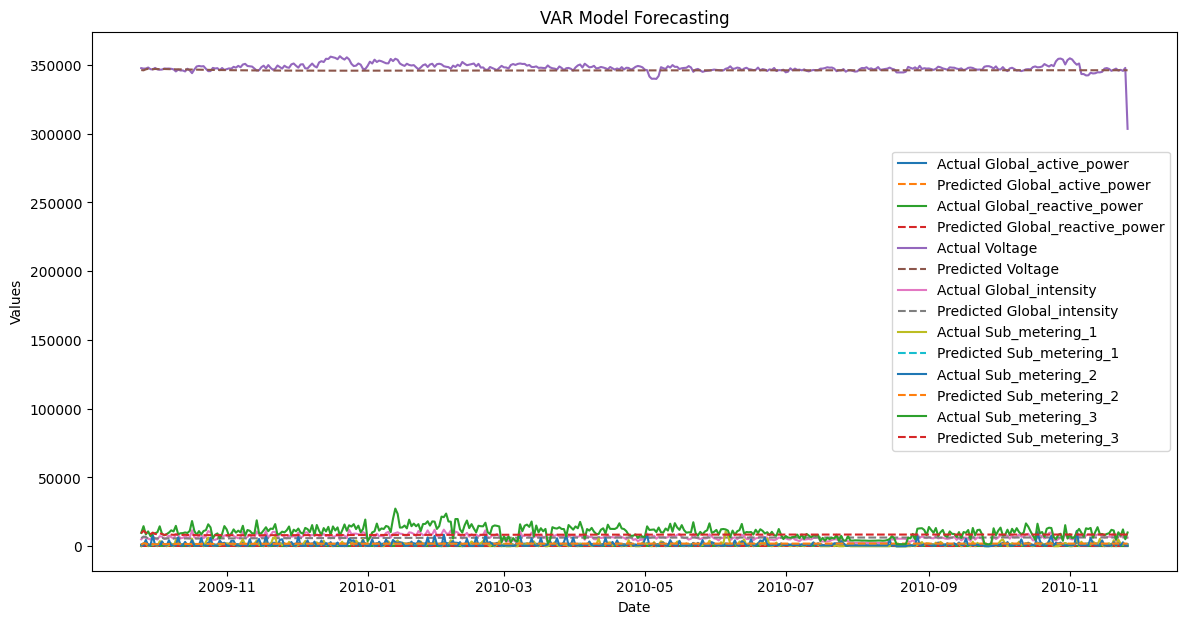

In [83]:
plt.figure(figsize=(14, 7))
for col in data_f.columns:
    plt.plot(test_df.index, test_df[col], label=f'Actual {col}')
    plt.plot(test_df.index, forecast_df[col], label=f'Predicted {col}', linestyle='dashed')

plt.title('VAR Model Forecasting')
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend()
plt.show()

#### FB-Prophet

In [145]:
from prophet import Prophet

# Assuming 'Date' is your datetime column and 'Global_active_power' is the target variable
train_prophet = train_df.reset_index()[['Date', 'Global_active_power']]
train_prophet.columns = ['ds', 'y']

# Create and fit the Prophet model
prophet_model = Prophet()
prophet_model.fit(train_prophet)

# Generate future dates for prediction
future = prophet_model.make_future_dataframe(periods=len(test_df))

# Make predictions
forecast = prophet_model.predict(future)

# Print the forecast DataFrame
(forecast.tail())


13:15:59 - cmdstanpy - INFO - Chain [1] start processing
13:15:59 - cmdstanpy - INFO - Chain [1] done processing


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1421,2010-11-22,1585.700075,1517.351647,2650.510037,1576.964319,1595.019475,491.058898,491.058898,491.058898,-149.923435,-149.923435,-149.923435,640.982333,640.982333,640.982333,0.0,0.0,0.0,2076.758973
1422,2010-11-23,1585.758685,1657.787139,2770.472942,1576.999230,1595.103795,631.891289,631.891289,631.891289,-21.832946,-21.832946,-21.832946,653.724235,653.724235,653.724235,0.0,0.0,0.0,2217.649974
1423,2010-11-24,1585.817295,1694.110725,2820.425135,1577.034141,1595.188115,641.718165,641.718165,641.718165,-19.998247,-19.998247,-19.998247,661.716412,661.716412,661.716412,0.0,0.0,0.0,2227.535460
1424,2010-11-25,1585.875905,1521.995265,2626.942736,1577.051365,1595.272435,478.656969,478.656969,478.656969,-186.467806,-186.467806,-186.467806,665.124775,665.124775,665.124775,0.0,0.0,0.0,2064.532874
1425,2010-11-26,1585.934515,1622.345495,2734.350921,1577.057525,1595.356755,611.741154,611.741154,611.741154,-52.466880,-52.466880,-52.466880,664.208034,664.208034,664.208034,0.0,0.0,0.0,2197.675669


In [148]:
import plotly.express as px

# Assuming `prophet_model` is your fitted Prophet model and `forecast` is the forecast DataFrame
fig = px.line(forecast, x='ds', y=['yhat', 'yhat_lower', 'yhat_upper'], title='Prophet Forecast')
fig.show()


In [149]:
from prophet.plot import plot_plotly, plot_components_plotly
plot_plotly(prophet_model, forecast)

In [151]:
from prophet.plot import plot_plotly, plot_components_plotly
plot_components_plotly(prophet_model, forecast)

In [152]:
test_prophet = test_df.reset_index()[['Date', 'Global_active_power']]
test_prophet.columns = ['ds', 'y']
test_prophet


,ds,y
0,2009-09-25,1161.016
1,2009-09-26,1556.254
2,2009-09-27,1410.472
3,2009-09-28,1299.456
4,2009-09-29,1146.398
...,...,...
423,2010-11-22,2041.536
424,2010-11-23,1577.536
425,2010-11-24,1796.248
426,2010-11-25,1431.164


In [153]:
pred = forecast.iloc[int(0.7 * len(data_f)):]['yhat']

In [154]:
from statsmodels.tools.eval_measures import rmse
rmse_val = rmse(pred, test_prophet['y'])
print("RMSE:-",rmse_val)
print('*'*50)
print('Mean value of the test dataset:-', test_prophet['y'].mean())

RMSE:- 395.2021209924179
**************************************************
Mean value of the test dataset:- 1574.9881542056073


1) If the RMSE (Root Mean Squared Error) value is less than the Mean value, it suggests that the model's predictions are relatively accurate compared to simply using the mean of the observed values as a prediction. This could indicate that the model is performing well and providing a reasonable fit to the data. A lower RMSE indicates better predictive performance, and if it is lower than the mean value, it implies that the model is capturing patterns and variations in the data effectively.

2) The RMSE is less than the Mean value of the test dataset so overall this look like good model